# **Project Name**    - OTT Merger Analysis

#### **Project Type**    - EDA (Exploratory data analysis)
##### **Domain**   - Telecom & Streaming Services 
##### **Function**     - Strategy & Operations
##### **Contribution**    - Individual
##### **Name**    - Suman Sadhukhan

# **Project Summary -**

<img src="OTT_Banner.png" width="800">


***This exploratory analysis evaluates two OTT platforms—Jotstar and LioCinema—to inform a strategic merger. We ingested subscriber, content, and consumption data; performed cleansing, feature engineering (e.g., churn flags, active-day counts, plan movements); and constructed a suite of visualizations. The EDA compares subscriber demographics and behavior, content library composition, and viewing patterns across devices, plans, and regions. Finally, based on these insights, we devise targeted recommendations—spanning content strategy, retention tactics, pricing bundles, and mobile-first UX improvements—to guide the combined platform’s roadmap.***

# **Problem Statement**


**Provide Insights for a Strategic Merger in the OTT Domain
Domain: Telecom & Streaming Services Function: Strategy & Operations
Lio, a leading telecommunications provider in India, is planning a strategic merger with Jotstar, one of the country’s most prominent streaming platforms. This potential partnership aims to combine LioCinema’s expansive subscriber base and Jotstar’s diverse content library to revolutionize digital streaming in India. As part of the merger preparation, the management team at Lio wants to analyse the performance and user behavior of both platforms—LioCinema and Jotstar—over the past one year (January to November 2024). The goal is to gain insights into individual platform performance, content consumption patterns, subscriber growth, Inactivity behavior, upgrade and downgrade trends. The insights derived from this study will help the management make informed decisions and optimize content strategies post-merger, with the ultimate goal of establishing Lio-Jotstar as the leading OTT platform in India. Peter Pandey is the data analyst at Lio, and he is tasked to analyse the data and provide insights. The management expects detailed insights into the following:**

**1. Content Library Analysis: A detailed comparison of content types across both platforms.**

**2. Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations.**

**3. Inactivity Analysis: Patterns of inactivity across age groups, city tiers, and subscription plans.**

**4. Upgrade Patterns: Insights into subscription upgrades and their influencing factors**

**5. Downgrade Patterns: Analysis of subscription downgrades and associated trends.**

**6. Content Consumption Behavior: Patterns in total watch time, device preferences, and variations by user demographics.**

# **📥 Setup & Configuration**

In [ ]:
# Install the PyMySQL package to enable Python to connect to MySQL databases
!pip install pymysql

# Import NumPy for efficient numerical computations (arrays, math functions, etc.)
import numpy as np

# Import pandas for data loading, cleaning, and manipulation (DataFrames)
import pandas as pd

# Import Matplotlib’s pyplot for creating static charts and figures
import matplotlib.pyplot as plt

# Import Seaborn for high-level statistical data visualization built on Matplotlib
import seaborn as sns

# Import SQLAlchemy’s engine creator to connect to databases in a DB-agnostic way
from sqlalchemy import create_engine

# Import display function to neatly render pandas DataFrames and other outputs in Jupyter
from IPython.display import display

In [ ]:
# Set options for wide display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# **🔄 Data Ingestion**

In [ ]:
# Define your MySQL connection parameters
user = 'root'
password = '1359'
host = 'localhost'
port = 1359
database = 'merger_db'

# ✅ Corrected connection string
connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Load all three tables into pandas DataFrames
df_subscribers = pd.read_sql("SELECT * FROM subscribers", con=engine)
df_contents = pd.read_sql("SELECT * FROM contents", con=engine)
df_consumption = pd.read_sql("SELECT * FROM content_consumption", con=engine)

# **🔍 Data Profiling / Initial Inspection**

In [199]:
# Iterate over each DataFrame along with its variable name
for df, name in [
    (df_contents, "df_contents"),
    (df_subscribers, "df_subscribers"),
    (df_consumption, "df_consumption")
]:
    # Print the DataFrame’s dimensions (rows, columns)
    print(f"\n➡️ {name} shape: {df.shape}")
    
    # Display the first few rows to verify column names and sample data
    print(f"➡️ {name} head()")
    display(df.head())
    
    # Display the last few rows to check for any trailing anomalies
    print(f"➡️ {name} tail()")
    display(df.tail())


➡️ df_contents shape: (3610, 6)
➡️ df_contents head()


,content_id,content_type,language,genre,run_time,platform
0,CJSMBEACT2e633,Movie,Bengali,Action,90,Jotstar
1,CJSMBEACT34aec,Movie,Bengali,Action,135,Jotstar
2,CJSMBEACT83b46,Movie,Bengali,Action,120,Jotstar
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120,Jotstar
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135,Jotstar


➡️ df_contents tail()


,content_id,content_type,language,genre,run_time,platform
3605,CLCSTEROMe2fe2,Series,Telugu,Romance,45,Liocinema
3606,CLCSTETHR03dcc,Series,Telugu,Thriller,30,Liocinema
3607,CLCSTETHR99295,Series,Telugu,Thriller,45,Liocinema
3608,CLCSTETHRa1536,Series,Telugu,Thriller,20,Liocinema
3609,CLCSTETHRf659a,Series,Telugu,Thriller,45,Liocinema



➡️ df_subscribers shape: (228066, 18)
➡️ df_subscribers head()


,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,platform,days_since_active,Inactive_Months,Status,User_Type,Total_Active_Days,Upgrade,Downgrade,Subscription_Price,month
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,2024-06-10,NaT,Premium,Jotstar,318,5,Inactive,Paid,0,NaN,NaN,359,2024-06
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,2024-11-09,NaT,Free,Jotstar,166,0,Active,Free,0,NaN,NaN,0,2024-11
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,2024-08-08,NaT,Free,Jotstar,259,3,Inactive,Free,0,NaN,NaN,0,2024-08
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,2024-05-31,NaT,VIP,Jotstar,328,6,Inactive,Paid,0,NaN,NaN,159,2024-05
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,2024-09-20,NaT,Premium,Jotstar,216,2,Inactive,Paid,0,NaN,NaN,359,2024-09


➡️ df_subscribers tail()


,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,platform,days_since_active,Inactive_Months,Status,User_Type,Total_Active_Days,Upgrade,Downgrade,Subscription_Price,month
228061,UIDLCffff41ace17,18-24,Tier 2,2024-10-16,Free,2024-11-07,NaT,Free,Liocinema,168,0,Active,Free,22,NaN,NaN,0,2024-10
228062,UIDLCffff85ea59a,25-34,Tier 2,2024-08-09,Basic,2024-08-09,NaT,Basic,Liocinema,258,3,Inactive,Paid,0,NaN,NaN,69,2024-08
228063,UIDLCffffbb55ff5,18-24,Tier 2,2024-11-22,Free,2024-11-22,NaT,Free,Liocinema,153,0,Active,Free,0,NaN,NaN,0,2024-11
228064,UIDLCffffc6f6db0,18-24,Tier 1,2024-05-01,Basic,2024-10-10,NaT,Basic,Liocinema,196,1,Active,Paid,162,NaN,NaN,69,2024-05
228065,UIDLCffffe3b01f9,25-34,Tier 3,2024-05-31,Free,2024-07-09,NaT,Free,Liocinema,289,4,Inactive,Free,39,NaN,NaN,0,2024-05



➡️ df_consumption shape: (564612, 6)
➡️ df_consumption head()


,user_id,device_type,total_watch_time_mins,platform,age_group,city_tier
0,UIDJS877cc0e02c9,Mobile,14613,Jotstar,45+,Tier 1
1,UIDJS06384e7ff06,Mobile,13271,Jotstar,25-34,Tier 1
2,UIDJSc3997b7beb7,Mobile,4644,Jotstar,18-24,Tier 3
3,UIDJS66726ce2325,Mobile,5734,Jotstar,18-24,Tier 1
4,UIDJS040119b6107,Mobile,2939,Jotstar,35-44,Tier 1


➡️ df_consumption tail()


,user_id,device_type,total_watch_time_mins,platform,age_group,city_tier
564607,UIDLC976c213a9f5,Laptop,620,Liocinema,25-34,Tier 2
564608,UIDLCee0ef0f566e,Laptop,337,Liocinema,25-34,Tier 2
564609,UIDLC9580d2b78b5,Laptop,563,Liocinema,35-44,Tier 2
564610,UIDLCcf3cbd323d3,Laptop,314,Liocinema,18-24,Tier 2
564611,UIDLC1cd59375868,Laptop,332,Liocinema,18-24,Tier 3


In [198]:
# 2. Schema & Types
for df, name in [
    (df_contents,    "df_contents"),
    (df_subscribers, "df_subscribers"),
    (df_consumption, "df_consumption")
]:
    print(f"➡️ {name}.info()")
    df.info()
    print()

➡️ df_contents.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content_id    3610 non-null   object
 1   content_type  3610 non-null   object
 2   language      3610 non-null   object
 3   genre         3610 non-null   object
 4   run_time      3610 non-null   int64 
 5   platform      3610 non-null   object
dtypes: int64(1), object(5)
memory usage: 169.3+ KB

➡️ df_subscribers.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228066 entries, 0 to 228065
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                228066 non-null  object        
 1   age_group              228066 non-null  object        
 2   city_tier              228066 non-null  object        
 3   subscription_date      228066 non-null  da

In [197]:
# 3. Missing‐Value Audit
def missing_overview(df):
    miss = df.isnull().sum()
    pct  = miss / len(df) * 100
    return pd.DataFrame({"missing": miss, "%": pct}).sort_values("%", ascending=False)

for df, name in [
    (df_contents,    "df_contents"),
    (df_subscribers, "df_subscribers"),
    (df_consumption, "df_consumption")
]:
    print(f"➡️ {name} missing values ")
    print(missing_overview(df).head(10))
    print()

➡️ df_contents missing values 
              missing    %
content_id          0  0.0
content_type        0  0.0
language            0  0.0
genre               0  0.0
run_time            0  0.0
platform            0  0.0

➡️ df_subscribers missing values 
                    missing          %
Upgrade              219563  96.271693
Downgrade            204465  89.651680
plan_change_date     195962  85.923373
user_id                   0   0.000000
Inactive_Months           0   0.000000
Subscription_Price        0   0.000000
Total_Active_Days         0   0.000000
User_Type                 0   0.000000
Status                    0   0.000000
days_since_active         0   0.000000

➡️ df_consumption missing values 
                       missing    %
user_id                      0  0.0
device_type                  0  0.0
total_watch_time_mins        0  0.0
platform                     0  0.0
age_group                    0  0.0
city_tier                    0  0.0



In [18]:
# 4. Duplicate Rows
for df, name in [
    (df_contents,    "df_contents"),
    (df_subscribers, "df_subscribers"),
    (df_consumption, "df_consumption")
]:
    print(f"{name} duplicates:", df.duplicated().sum())
    # if >0, drop with: df.drop_duplicates(inplace=True)

df_contents duplicates: 0
df_subscribers duplicates: 0
df_consumption duplicates: 0


In [195]:
# 5. Descriptive Statistics
print("\n➡️ df_contents.describe()")
print(df_contents.describe())

print("\n➡️ df_subscribers.describe()")
print(df_subscribers.describe())


➡️ df_contents.describe()
          run_time
count  3610.000000
mean     94.188366
std      50.817566
min       5.000000
25%      45.000000
50%     120.000000
75%     135.000000
max     300.000000

➡️ df_subscribers.describe()
       days_since_active  Inactive_Months  Total_Active_Days  Subscription_Price
count      228066.000000    228066.000000      228066.000000       228066.000000
mean          247.077982         2.914990          23.421724           64.733726
std            88.535776         2.838927          44.069146           91.824214
min           116.000000         0.000000           0.000000            0.000000
25%           173.000000         0.000000           0.000000            0.000000
50%           224.000000         2.000000           0.000000            0.000000
75%           308.000000         5.000000          36.000000          129.000000
max           479.000000        10.000000         333.000000          359.000000


In [196]:
# 6. Cardinality & Uniques
def cardinality(df, cols):
    for c in cols:
        print(f"{c}: {df[c].nunique()} unique")

print("\n➡️ df_contents cardinality")
cardinality(df_contents,    ["content_type","genre","language","platform"])

print("\n➡️ df_subscribers cardinality")
cardinality(df_subscribers, ["age_group","city_tier","subscription_plan","platform"])

print("\n➡️ df_consumption cardinality")
cardinality(df_consumption, ["device_type","platform"])


➡️ df_contents cardinality
content_type: 3 unique
genre: 14 unique
language: 10 unique
platform: 2 unique

➡️ df_subscribers cardinality
age_group: 4 unique
city_tier: 3 unique
subscription_plan: 4 unique
platform: 2 unique

➡️ df_consumption cardinality
device_type: 3 unique
platform: 2 unique


# *🧹 Data Cleaning & Wrangling*

In [ ]:
# Ensure dates are datetimes ──────────────────────────────────────────
for col in ['subscription_date','plan_change_date']:
    df_subscribers[col] = pd.to_datetime(df_subscribers[col])
# → Date conversion ensures any blank dates become NaT and we can do arithmetic.

In [ ]:
# 1. last_active_date → impute with subscription_date
#    WHY: a missing last_active_date means the user never came back after signup.
#         By filling with subscription_date we’ll get days_since_active=0,
#         which correctly flags “never returned” users in any recency charts.
df_subscribers['last_active_date'] = (
    df_subscribers['last_active_date']
      .fillna(df_subscribers['subscription_date'])
)

In [ ]:
# 2. plan_change_date → leave as NaT
#    WHY: “never changed plan” is a valid state.  If we imputed a dummy date,
#         our plan_change_lag logic would produce confusing non-zero values.
#    ⇒ No code needed: keep the column as-is so downstream you can filter NaT.

In [ ]:
# 3. new_subscription_plan → standardize to subscription_plan
#    WHY: a missing new_subscription_plan truly means “no change.”  
#         By filling with the current plan, any diff-based logic (e.g. comparing 
#         prev vs. new) will automatically yield “no change” instead of error.
df_subscribers['new_subscription_plan'] = (
    df_subscribers['new_subscription_plan']
      .fillna(df_subscribers['subscription_plan'])
)

# *🛠 Feature Engineering*

In [ ]:
# 1. days_since_active: compute now that last_active_date is filled
df_subscribers['days_since_active'] = (
    (pd.to_datetime('today') - df_subscribers['last_active_date'])
      .dt.days)
# → Helps in recency and churn modeling; ensures a numeric field everywhere.

In [ ]:
# ── 2. Inactive Months ────────────────────────────────────────────────────
# Inactive_Months measures how long since last seen (or since signup if never seen).
#    (how many months since last seen → 0 if negative)

max_sub = df_subscribers['subscription_date'].max()
last_act = df_subscribers['last_active_date']
month_diff = ((max_sub.year - last_act.dt.year) * 12 +
              (max_sub.month - last_act.dt.month))
df_subscribers['Inactive_Months'] = month_diff.clip(lower=0)
# → Inactive_Months measures how long since last seen (or since signup if never seen).

In [ ]:
# ── 3. Status ─────────────────────────────────────────────────────────────
# Status flags anyone idle for >90 days as “Inactive.”
#    Active if seen in last 90 days of our data’s last activity

max_act = df_subscribers['last_active_date'].max()
days_diff = (max_act - df_subscribers['last_active_date']).dt.days
df_subscribers['Status'] = np.where(days_diff <= 90, 'Active', 'Inactive')
# → Status flags anyone idle for >90 days as “Inactive.”


In [ ]:
# ── 4. User_Type ──────────────────────────────────────────────────────────
# User_Type splits free vs. paid subs.

df_subscribers['User_Type'] = np.where(
    df_subscribers['subscription_plan'] == 'Free', 
    'Free', 'Paid'
)
# → User_Type splits free vs. paid subs.

In [ ]:
# ── 5. Total Active Days ─────────────────────────────────────────────────
# Total_Active_Days is your simple lifetime in days.

df_subscribers['Total_Active_Days'] = (
    (df_subscribers['last_active_date'] - df_subscribers['subscription_date'])
      .dt.days
)
# → Total_Active_Days is your simple lifetime in days.

In [ ]:
# ── 6. Upgrade / Downgrade ────────────────────────────────────────────────
# Upgrade/Downgrade uses your plan-mapping logic to capture change direction.
# ── A) Define plan_direction with EXACT platform spellings ────────────────
def plan_direction(prev, new, plat):
    rules = {
      # Liocinema downgrades
      ('Liocinema','Premium','Basic'):   'Premium to Basic',
      ('Liocinema','Basic',  'Free'):    'Basic to Free',
      ('Liocinema','Premium','Free'):    'Premium to Free',
      # Jotstar downgrades
      ('Jotstar',  'Premium','VIP'):     'Premium to VIP',
      ('Jotstar',  'VIP',    'Free'):    'VIP to Free',
      ('Jotstar',  'Premium','Free'):    'Premium to Free',
      # Liocinema upgrades
      ('Liocinema','Free',   'Basic'):   'Free to Basic',
      ('Liocinema','Basic',  'Premium'): 'Basic to Premium',
      ('Liocinema','Free',   'Premium'): 'Free to Premium',
      # Jotstar upgrades
      ('Jotstar',  'Free',   'VIP'):     'Free to VIP',
      ('Jotstar',  'VIP',    'Premium'): 'VIP to Premium',
      ('Jotstar',  'Free',   'Premium'): 'Free to Premium'
    }
    return rules.get((plat, prev, new))


# ── B) Build the `directions` Series ──────────────────────────────────────
directions = df_subscribers.apply(
    lambda r: plan_direction(
                  r['subscription_plan'],
                  r['new_subscription_plan'],
                  r['platform']
              ),
    axis=1
)


# ── C) Define exactly which text labels count as upgrades vs. downgrades ─
upgrade_list = [
    'Free to Basic', 'Basic to Premium', 'Free to Premium',   # Liocinema upgrades
    'Free to VIP',   'VIP to Premium',   'Free to Premium'    # Jotstar upgrades
]

downgrade_list = [
    'Premium to Basic', 'Basic to Free', 'Premium to Free',   # Liocinema downgrades
    'Premium to VIP',   'VIP to Free',     'Premium to Free'   # Jotstar downgrades
]


# ── D) Now split cleanly via .isin() ───────────────────────────────────
df_subscribers['Upgrade']   = directions.where(directions.isin(upgrade_list))
df_subscribers['Downgrade'] = directions.where(directions.isin(downgrade_list))

# → Upgrade/Downgrade uses your plan-mapping logic to capture change direction.

In [ ]:
# ── 7. Subscription Price ─────────────────────────────────────────────────
# Subscription_Price looks up each plan’s MRR.

price_map = {
    ('Liocinema','Basic'):   69,
    ('Liocinema','Premium'): 129,
    ('Jotstar',  'VIP'):     159,
    ('Jotstar',  'Premium'): 359
}
df_subscribers['Subscription_Price'] = df_subscribers.apply(
    lambda r: price_map.get((r['platform'], r['subscription_plan']), 0),
    axis=1
)
# → Subscription_Price looks up each plan’s MRR.

In [ ]:
# ── Final Sanity Check ────────────────────────────────────────────────────
display(df_subscribers[[
    'Inactive_Months','Status','User_Type',
    'Total_Active_Days','Upgrade','Downgrade','Subscription_Price'
]].info())
display(df_subscribers.head())

In [ ]:
# 4. Upgrade / Downgrade → leave blanks
#    WHY: we only care about rows where a change actually happened.
#         NaNs in these two columns naturally drop out of any funnel or count
#         analyses of plan movements.
#    ⇒ No code needed: keep the columns as-is.

# **📊 Exploratory Analysis**

## *👤 Subscribers Table*

### 🔹 1. *Platform Size Breakdown*

Goal: Show the relative subscriber base per platform

Chart: Annotated bar chart

EDA Type: Univariate

Structure: Simple bar with value + percent labels

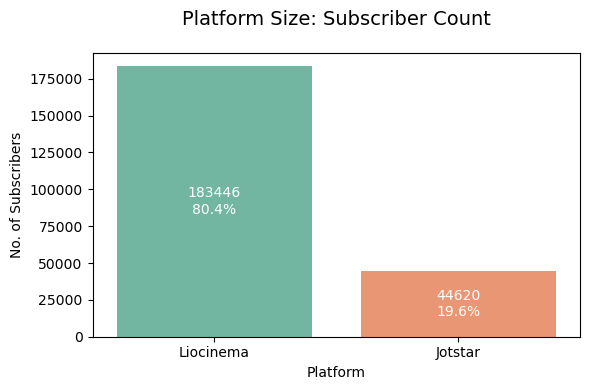

In [202]:
# Count how many subscribers each platform has
counts = df_subscribers['platform'].value_counts()

# Calculate what percentage each platform contributes to the total
percentages = counts / counts.sum() * 100

# Get the platforms in order (e.g., ['Jotstar', 'LioCinema'])
order = counts.index

# Create a bar chart of platform subscriber counts
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=order, y=counts.values, palette='Set2', ax=ax)

# Set the title and axis labels for clarity
ax.set_title('Platform Size: Subscriber Count', fontsize=14, pad=20)
ax.set_ylabel('No. of Subscribers')  # Y-axis shows how many subscribers
ax.set_xlabel('Platform')            # X-axis shows each platform

# Add labels inside the bars to show actual count and percentage
for i, plat in enumerate(order):
    count = counts[plat]             # Get subscriber count
    pct = percentages[plat]          # Get % share of total
    ax.text(
        i,                           # Horizontal position (bar index)
        count / 2,                   # Vertical position (half the bar height)
        f"{count}\n{pct:.1f}%",      # Label: count and percentage
        ha='center', va='center',    # Center text alignment
        color='white', fontsize=10   # Make text white so it stands out
    )

# Add extra spacing on top so title doesn't get cut off
fig.subplots_adjust(top=0.85)

# Automatically adjust layout for better spacing
plt.tight_layout()

# Display the final chart
plt.show()

# → Bivariate insight on revenue-generating capacity of each platform.

#### *INSIGHTS* --- 
Liocinema holds a dominant 80.4% market share, indicating stronger brand presence and broader user reach. Jotstar, with only 19.6%, has significant growth potential if strategic efforts target niche segments or underserved regions.


### 🔹 2. *User Type Split (Free vs Paid)*

Goal: Show monetization ratio per platform

Chart: Stacked bar chart

EDA Type: Bivariate

Structure: Stacked to show proportions within each platform

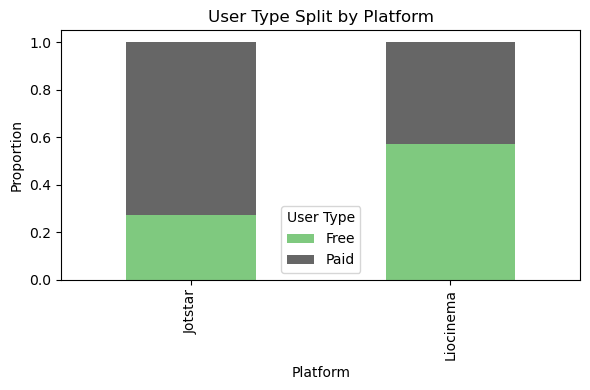

In [158]:
# Create a cross-tabulation between platform and user type
# normalize='index' ensures we get proportion values (0 to 1)
platform_user = pd.crosstab(df_subscribers['platform'], df_subscribers['User_Type'], normalize='index')

# Plot as a stacked bar chart to show proportion of user types per platform
platform_user.plot(
    kind='bar',                # Type of chart: bar
    stacked=True,              # Stack bars on top of each other to show composition
    colormap='Accent',         # Color scheme
    figsize=(6, 4)             # Size of the chart
)

# Set title and axis labels
plt.title('User Type Split by Platform')  # Chart title
plt.ylabel('Proportion')                  # Y-axis shows the share (0 to 1)
plt.xlabel('Platform')                    # X-axis is each platform

# Add a legend to label the user types
plt.legend(title='User Type')

# Automatically adjust layout to avoid overlapping text
plt.tight_layout()

# Show the plot
plt.show()

#### *INSIGHTS* --- 
Liocinema has a higher proportion of free users, suggesting strong reach but potential monetization gaps. In contrast, Jotstar relies more heavily on paid users, indicating a more conversion-focused model.

### *🔹 3. Monthly Subscriber Growth*

Goal: Visualize subscriber acquisition trends over time

Chart: Line chart

EDA Type: Univariate

Structure: Temporal trend for a single metric

In [120]:
# Convert subscription_date to monthly period
df_subscribers['month'] = df_subscribers['subscription_date'].dt.to_period('M')

# Count new subscribers per month
monthly_df = df_subscribers.groupby('month').size().rename("new_subscribers").to_frame()

# Calculate Month-over-Month growth
monthly_df['mom_growth'] = monthly_df['new_subscribers'].pct_change() * 100

# Format month names like 'Jan', 'Feb'
monthly_df['month_str'] = monthly_df.index.to_timestamp().strftime('%b')


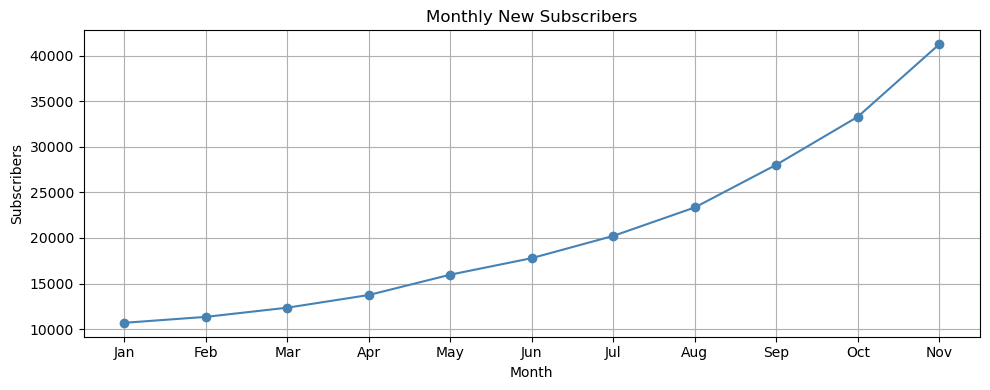

In [204]:
# Set figure size for clarity
plt.figure(figsize=(10, 4))

# Plot the number of new subscribers over months
plt.plot(
    monthly_df['month_str'],             # X-axis: month labels
    monthly_df['new_subscribers'],       # Y-axis: number of new subscribers
    marker='o',                          # Add circle markers at data points
    color='steelblue'                    # Line color
)

# Set the title and axis labels
plt.title("Monthly New Subscribers")     # Main title
plt.xlabel("Month")                      # X-axis label
plt.ylabel("Subscribers")                # Y-axis label

# Add grid lines for better readability
plt.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


#### INSIGHTS ---
Subscriber growth has followed a strong upward trajectory, with new signups accelerating significantly after June. This sustained momentum suggests effective acquisition campaigns or seasonal demand peaks, warranting continued investment in scaling efforts.

### *🔹 4. Month-over-Month Subscriber Growth (Platform-wise)*
Goal: Track monthly growth dynamics for each platform and identify performance fluctuations over time

Chart: Side-by-side line charts with percentage labels

EDA Type: Time series analysis (segmented by platform)

Structure: Separate trendlines for each platform showing growth momentum month-by-month

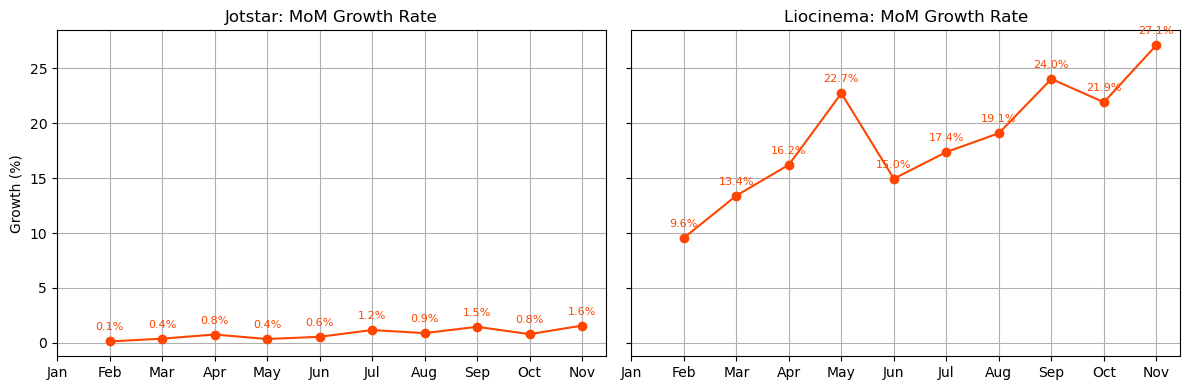

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

# 📌 STEP 1: Extract Month from subscription date and count signups by month and platform
df_subscribers['month'] = df_subscribers['subscription_date'].dt.to_period('M')
monthly = (
    df_subscribers
      .groupby(['month','platform'])
      .size()
      .unstack(fill_value=0)
)

# 📌 STEP 2: Calculate Month-over-Month (MoM) growth %
mom_pct = monthly.pct_change() * 100

# 📌 STEP 3: Convert month format to short names
month_labels = mom_pct.index.to_timestamp().strftime('%b')

# 📌 STEP 4: Plot setup
platforms = mom_pct.columns.tolist()
fig, axes = plt.subplots(
    1, len(platforms),
    figsize=(6 * len(platforms), 4),
    sharey=True
)

# 📌 STEP 5: Plot each platform
for ax, plat in zip(axes, platforms):
    growth_values = mom_pct[plat].values
    ax.plot(
        month_labels,
        growth_values,
        marker='o',
        linestyle='-',
        color='orangered'
    )
    
    # Add data labels above each point
    for i, val in enumerate(growth_values):
        if pd.notna(val):
            ax.text(
                i, val + 1,               # Slightly above the point
                f"{val:.1f}%",           # Format as percentage
                ha='center',
                fontsize=8,
                color='orangered'
            )

    # Titles and grid
    ax.set_title(f"{plat}: MoM Growth Rate")
    ax.set_xlabel("")
    if ax is axes[0]:
        ax.set_ylabel("Growth (%)")
    ax.grid(True)
    
    ax.set_xticks(range(len(month_labels)))
    ax.set_xticklabels(month_labels, rotation=0)

# 📌 STEP 6: Layout and show
plt.tight_layout()
plt.show()


#### INSIGHTS ---
Liocinema demonstrates strong and consistent MoM growth, peaking at 27.1% in November—indicating aggressive user acquisition or successful engagement strategies. In contrast, Jotstar shows stagnant growth below 2%, suggesting limited market traction and a need for strategic revamp to boost visibility and user conversion.

### *🔹 5. Plan Distribution by Platform*

Goal: Analyze how users are distributed across plan tiers

Chart: Side-by-side bar plots (subplots for each platform)

EDA Type: Bivariate

Structure: Subplots allow comparison while preserving unique plan names

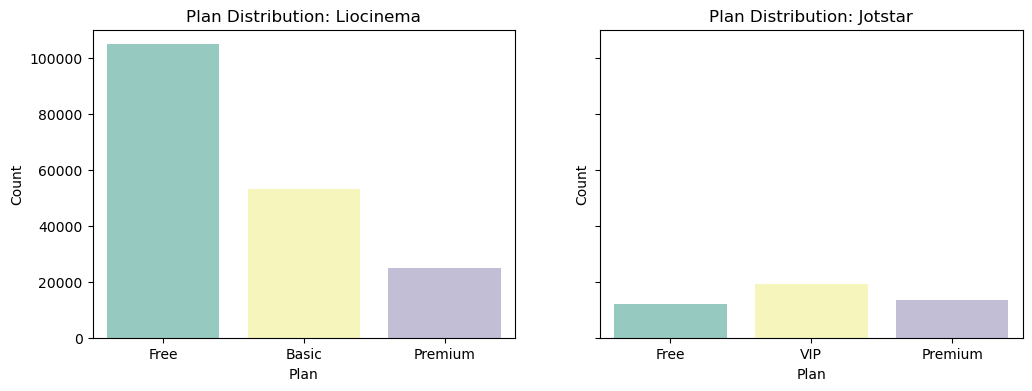

In [207]:
# Define the two OTT platforms to compare
platforms = ['Liocinema', 'Jotstar']

# Define custom order of subscription plans for each platform
# (this ensures that 'Free' always appears before 'Premium', etc.)
plan_orders = {
    'Liocinema': ['Free', 'Basic', 'Premium'],
    'Jotstar':   ['Free', 'VIP',   'Premium']
}

# Create a subplot layout with 1 row and 2 columns
# 'sharey=True' keeps the Y-axis scale the same for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Loop through each platform and corresponding subplot axis
for ax, plat in zip(axes, platforms):
    
    # Filter the subscriber DataFrame for the current platform
    subset = df_subscribers[df_subscribers['platform'] == plat]
    
    if not subset.empty:
        # Create a count plot showing number of users in each plan
        sns.countplot(
            data=subset,                     # Data for current platform
            x='subscription_plan',           # X-axis: plan type
            order=plan_orders[plat],         # Ensure correct order
            palette='Set3',                  # Color palette
            ax=ax                            # Plot on the specific subplot
        )
        
        # Add plot title and axis labels
        ax.set_title(f'Plan Distribution: {plat}')
        ax.set_xlabel('Plan')               # Label for X-axis
        ax.set_ylabel('Count')              # Label for Y-axis
        
    else:
        # If no data is available for a platform, show a message instead
        ax.text(0.5, 0.5, f'No data for {plat}',
                ha='center', va='center', fontsize=12)
        ax.set_title(f'Plan Distribution: {plat}')
        ax.axis('off')                      # Hide empty plot


#### INSIGHTS ---
Liocinema has a dominant share of free users, but a sizable portion also subscribes to Basic and Premium plans, indicating effective freemium-to-paid conversion. Jotstar shows a more balanced distribution across plans, but overall volumes are low—suggesting weaker acquisition or retention strategies compared to Liocinema.

### *🔹 6. Active vs Inactive Users*

Goal: Understand churn and retention trends across platforms

Chart: Clustered bar chart

EDA Type: Bivariate analysis

Structure: Side-by-side by platform for comparison

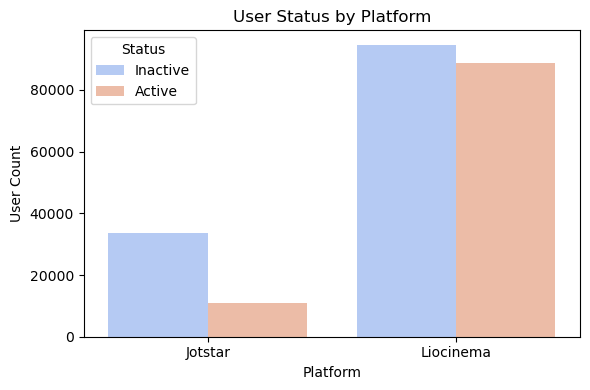

In [208]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create a grouped bar chart showing count of active vs inactive users for each platform
sns.countplot(
    data=df_subscribers,      # Use the subscribers dataset
    x='platform',             # X-axis: Platform (e.g., LioCinema, Jotstar)
    hue='Status',             # Bar color split by user status (Active/Inactive)
    palette='coolwarm'        # Color palette for the bars
)

# Add plot title and axis labels
plt.title('User Status by Platform')  # Chart title
plt.ylabel('User Count')              # Y-axis: Number of users
plt.xlabel('Platform')                # X-axis: Platform names

# Add legend to explain the color-coded statuses
plt.legend(title='Status')

# Adjust layout to ensure nothing is cut off
plt.tight_layout()

# Display the final plot
plt.show()


#### INSIGHTS ---
Liocinema maintains a high number of both active and inactive users, reflecting a strong overall user base with good engagement. In contrast, Jotstar not only has significantly fewer users, but also a much lower proportion of active ones, pointing to challenges in user retention and platform engagement.

### 🔹 *7. Subscriber Demographics (City Tier × Age Group)*

Goal: Understand user base spread across regions and age brackets

Chart: Heatmap

EDA Type: Multivariate

Structure: Grid-style visualization for intuitive cross-tab analysis

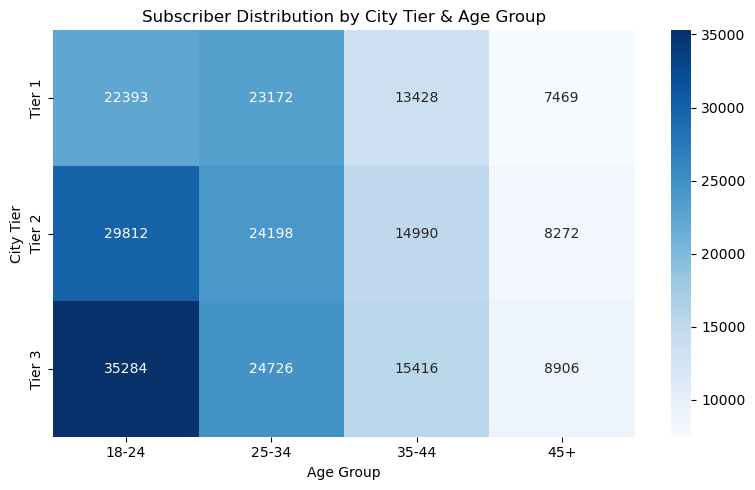

In [210]:
# Count of users across combinations of City Tier and Age Group
sub_dist = df_subscribers.groupby(['city_tier', 'age_group']).size().unstack(fill_value=0)
# → Creates a matrix where rows = city tier, columns = age groups, and values = user counts

# Set the figure size for the heatmap
plt.figure(figsize=(8, 5))

# Plot the heatmap using seaborn
sns.heatmap(
    sub_dist,         # Matrix of subscriber counts
    annot=True,       # Annotate each cell with the numeric count
    fmt="d",          # Format annotations as integers
    cmap="Blues"      # Color palette for better visual contrast
)

# Set chart title and axis labels
plt.title("Subscriber Distribution by City Tier & Age Group")
plt.xlabel("Age Group")
plt.ylabel("City Tier")

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the final visualization
plt.show()

#### INSIGHTS ---
Tier 3 cities show the highest subscriber count across all age groups, especially among 18–24 year-olds (35.2k), suggesting strong youth engagement in less urbanized regions. Tier 1 cities, while more developed, contribute the least across all age segments, highlighting untapped potential. The 25–34 age group consistently performs well across all tiers, making it a key demographic for targeted campaigns.

### *🔹 8. Revenue by City Tier & Age Group (Per Platform)*

Goal: Understand revenue contribution segmented by demographics

Chart: Grouped bar chart (subplot per platform)

EDA Type: Multivariate

Structure: One subplot per platform, grouped bars by age group within city tiers

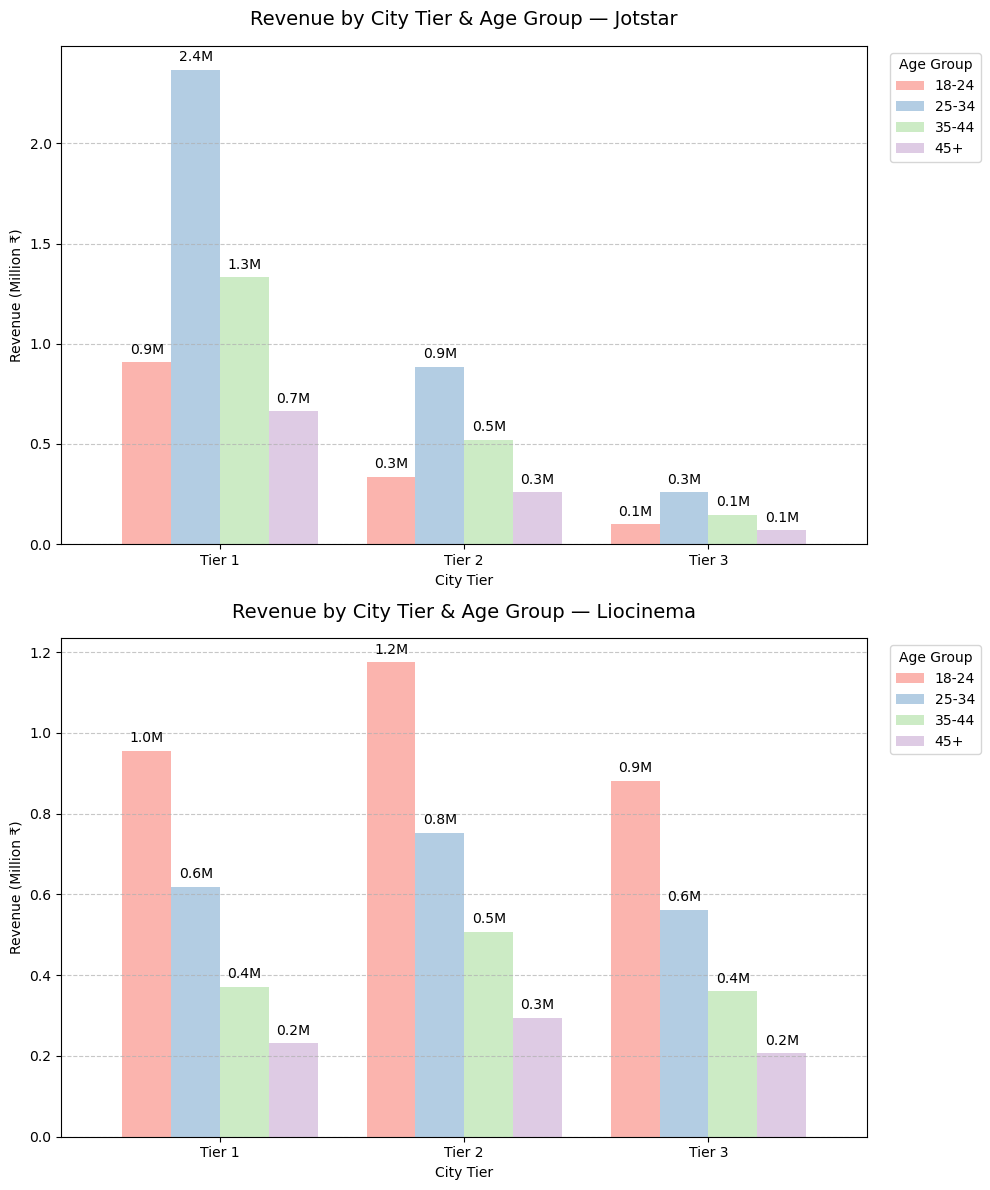

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a soft, readable color palette
palette = sns.color_palette("Pastel1")

# Get all unique platforms (e.g., Liocinema, Jotstar)
platforms = df_subscribers['platform'].unique()

# Create subplots: one row per platform
fig, axes = plt.subplots(
    len(platforms),           # One plot per platform
    1,                        # Single column layout
    figsize=(10, 6 * len(platforms)),  # Height grows with number of platforms
    sharex=False              # Allow independent X-axes
)

# Iterate over each platform and its subplot axis
for ax, plat in zip(axes, platforms):
    
    # Filter data for the current platform
    df_plat = df_subscribers[df_subscribers['platform'] == plat]
    
    # Group revenue by city tier and age group, then pivot it into a matrix
    rev = (
        df_plat
        .groupby(['city_tier', 'age_group'])['Subscription_Price']
        .sum()
        .unstack(fill_value=0)   # Missing combinations become 0
    )
    
    # Convert ₹ to Millions
    rev_m = rev / 1_000_000

    # Plot grouped bar chart on current axis
    bars = rev_m.plot(
        kind='bar',       # Bar chart
        ax=ax,            # Current subplot
        color=palette,    # Custom pastel palette
        width=0.8
    )

    # Add chart title and axis labels
    ax.set_title(f"Revenue by City Tier & Age Group — {plat}", pad=15, fontsize=14)
    ax.set_ylabel("Revenue (Million ₹)")
    ax.set_xlabel("City Tier")

    # Place legend outside plot area
    ax.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc='upper left')

    # Add value annotations on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1fM', padding=4, fontsize=10)

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Add horizontal gridlines for visual clarity
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust overall layout to avoid overlaps
plt.tight_layout()

# Render all plots
plt.show()


#### INSIGHTS ---
Jotstar earns the bulk of its revenue from Tier 1 cities, especially from the 25–34 age group. Revenue sharply declines in lower-tier cities.
Liocinema shows a more balanced revenue spread across all city tiers, with strong contributions from the 18–24 age group, particularly in Tier 2 and Tier 3 cities.
Overall, Jotstar relies on urban, older users, while Liocinema benefits from a wider, younger user base across city tiers.

### *🔹 9. Average User Engagement (Total Active Days)*

Goal: Measure user stickiness by platform

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bar length shows average active days per platform

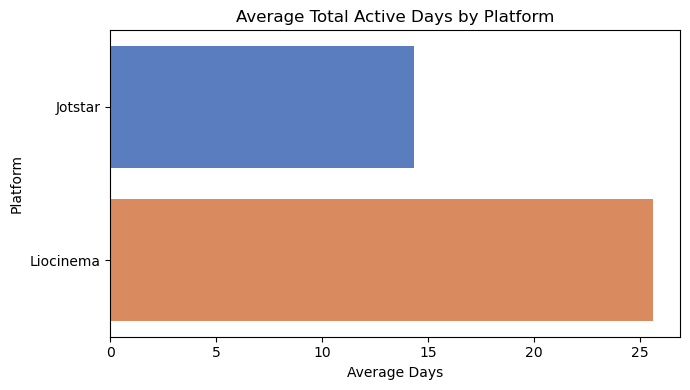

In [212]:
# Calculate average active days per platform
avg_active_days = df_subscribers.groupby('platform')['Total_Active_Days'].mean().sort_values()

# Set figure size for clarity
plt.figure(figsize=(7, 4))

# Create horizontal bar chart of average active days
sns.barplot(
    x=avg_active_days.values,     # Bar length = average days
    y=avg_active_days.index,      # Bar labels = platform names
    palette='muted'               # Color scheme
)

# Set chart title and labels
plt.title('Average Total Active Days by Platform')  # Main title
plt.xlabel('Average Days')                          # X-axis: values
plt.ylabel('Platform')                              # Y-axis: platform names

# Auto layout for padding and clarity
plt.tight_layout()

# Show the final plot
plt.show()


#### INSIGHTS ---
Liocinema users are significantly more active, averaging over 25 days, compared to just around 14 days for Jotstar.
This indicates higher user engagement and stickiness on the Liocinema platform.
Jotstar may need to enhance its content or user experience to boost user retention and activity levels.

### *🔹 10. Plan Migration: Upgrades vs Downgrades*
Goal: Track user movement between plans across platforms

Chart: Grouped bar charts (upgrades and downgrades)

EDA Type: Bivariate

Structure: 2x2 subplot grid showing plan shifts per platform

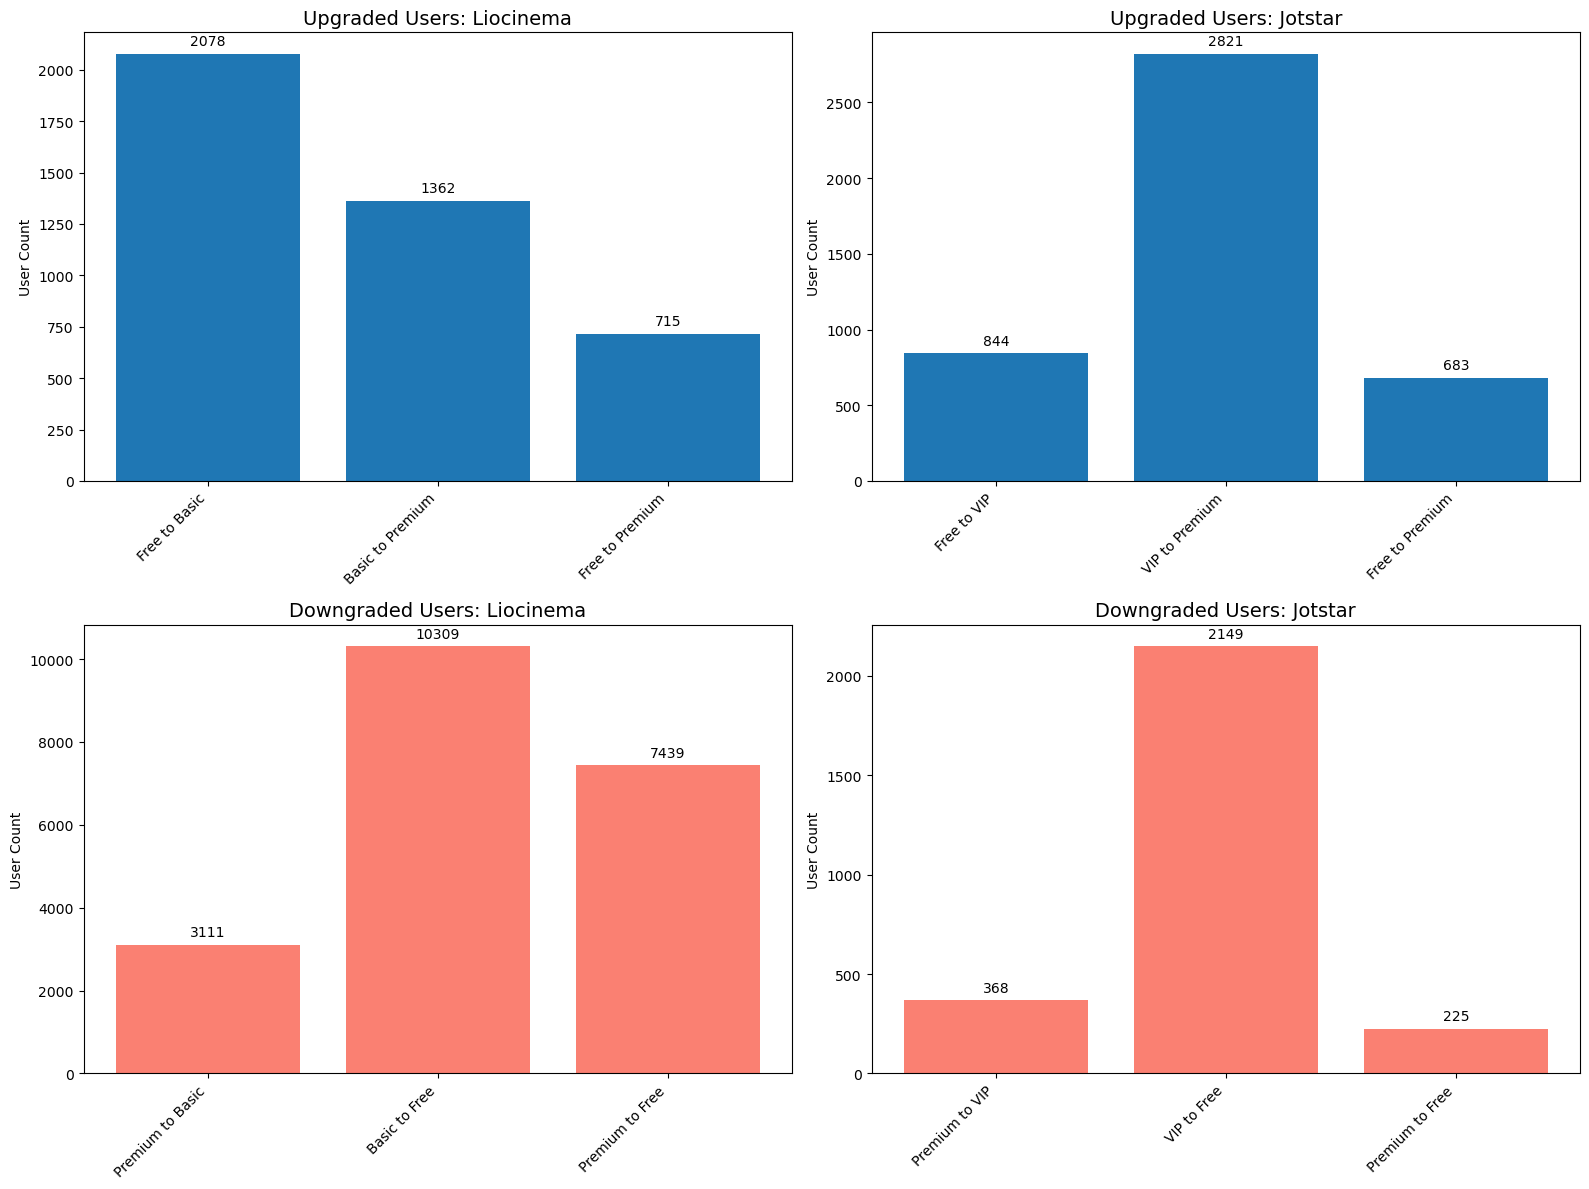

In [213]:
import matplotlib.pyplot as plt

# Define the specific plan transitions we care about, separated by platform
upgrade_orders = {
    'Liocinema': ['Free to Basic', 'Basic to Premium', 'Free to Premium'],
    'Jotstar':   ['Free to VIP',   'VIP to Premium',  'Free to Premium']
}
downgrade_orders = {
    'Liocinema': ['Premium to Basic', 'Basic to Free',   'Premium to Free'],
    'Jotstar':   ['Premium to VIP',   'VIP to Free',     'Premium to Free']
}

# Create 2 rows (upgrades & downgrades) × 2 columns (platforms)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4)  # Vertical spacing between subplots

# ───── Top row: Upgrades ─────
for ax, plat in zip(axes[0], ['Liocinema', 'Jotstar']):
    # Count plan upgrades and align them in a defined order
    counts = (
        df_subscribers.loc[df_subscribers['platform'] == plat, 'Upgrade']
                      .value_counts()
                      .reindex(upgrade_orders[plat], fill_value=0)
    )
    x = range(len(counts))  # Bar positions
    ax.bar(x, counts.values)  # Draw bar chart
    ax.set_title(f'Upgraded Users: {plat}', fontsize=14)
    ax.set_ylabel('User Count')

    # Set proper x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(counts.index, rotation=45, ha='right')

    # Annotate exact values on top of bars
    for i, v in enumerate(counts.values):
        ax.text(i, v + max(counts.values)*0.02, str(int(v)), ha='center')

# ───── Bottom row: Downgrades ─────
for ax, plat in zip(axes[1], ['Liocinema', 'Jotstar']):
    # Count plan downgrades and align them in a defined order
    counts = (
        df_subscribers.loc[df_subscribers['platform'] == plat, 'Downgrade']
                      .value_counts()
                      .reindex(downgrade_orders[plat], fill_value=0)
    )
    x = range(len(counts))  # Bar positions
    ax.bar(x, counts.values, color='salmon')  # Bar chart in salmon color
    ax.set_title(f'Downgraded Users: {plat}', fontsize=14)
    ax.set_ylabel('User Count')

    # Set x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(counts.index, rotation=45, ha='right')

    # Annotate values
    for i, v in enumerate(counts.values):
        ax.text(i, v + max(counts.values)*0.02, str(int(v)), ha='center')

# Ensure layout fits everything
plt.tight_layout()

# Show the final visualization
plt.show()


#### INSIGHTS ---
Liocinema has a larger downgrade issue, especially from Basic to Free (10,309 users), suggesting retention challenges.
Jotstar sees more upgrades to Premium, particularly from VIP users, showing stronger tier loyalty.
While both platforms face downgrades, Liocinema's volume is significantly higher, indicating an urgent need for churn mitigation strategies.

### *🔹 11. Inactive Months Distribution*

Goal: Compare subscriber inactivity duration between platforms

Chart: Overlaid Kernel Density Estimate (KDE) plots

EDA Type: Univariate

Structure: Overlaid lines for visual density comparison

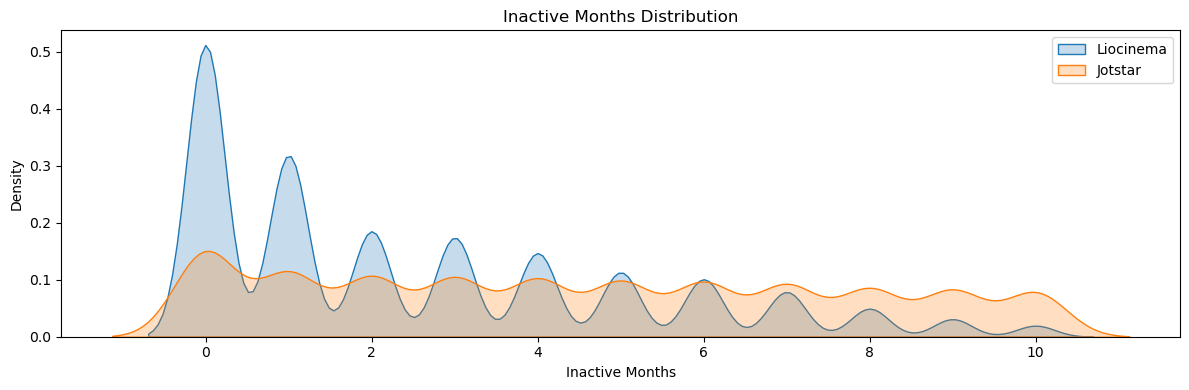

In [214]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(12, 4))

# Loop through each platform and plot KDE for their inactivity
for plat in ['Liocinema', 'Jotstar']:
    subset = df_subscribers[df_subscribers['platform'] == plat]  # Filter for platform
    sns.kdeplot(
        subset['Inactive_Months'],  # Distribution of inactivity months
        label=plat,                 # Label for legend
        fill=True                   # Fill area under curve for visual clarity
    )

# Title and axis labels
plt.title('Inactive Months Distribution')  # Main title
plt.xlabel('Inactive Months')              # X-axis: months of inactivity
plt.ylabel('Density')                      # Y-axis: probability density

# Add legend to distinguish platforms
plt.legend()

# Auto-adjust layout for spacing
plt.tight_layout()

# Display the KDE plot
plt.show()


#### INSIGHTS ---
Liocinema users tend to become inactive quickly but return intermittently, showing sharp density peaks at regular intervals.
Jotstar's inactivity is more spread out and sustained over longer periods, suggesting gradual disengagement.
This contrast indicates Liocinema may benefit from short-term re-engagement nudges, while Jotstar needs long-term retention strategies

### *🔹 12. Paid Subscription Price Distribution*
Goal: Explore pricing spread and concentration for paid users across platforms

Chart: Violin plot

EDA Type: Univariate (per platform)

Structure: Split by platform to compare pricing shapes and quartiles

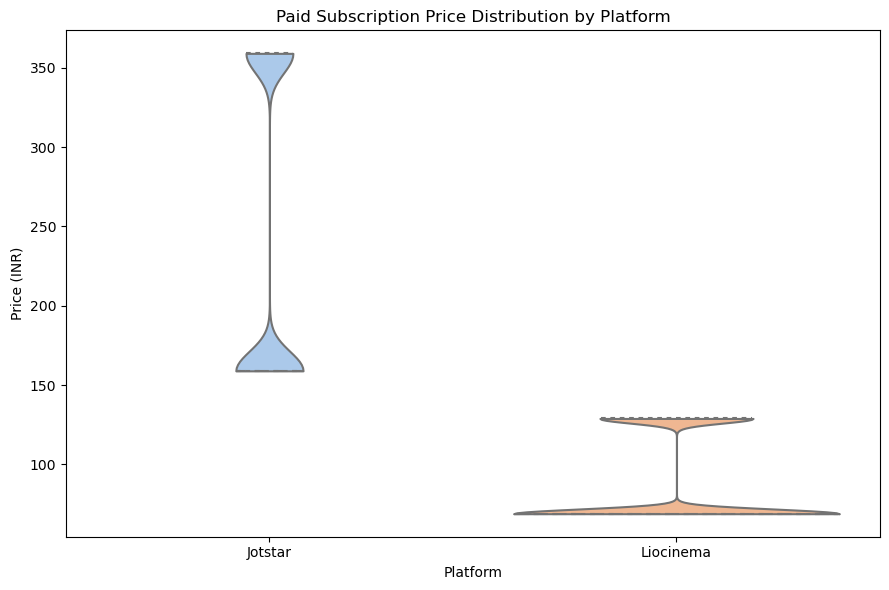

In [215]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out only users with a paid subscription (price > 0)
paid = df_subscribers[df_subscribers['Subscription_Price'] > 0]

# Set the figure size for better visibility
plt.figure(figsize=(9, 6))

# Create violin plots to show the distribution of subscription prices per platform
sns.violinplot(
    data=paid,                   # Use filtered paid-only data
    x='platform',                # X-axis: platforms (categorical)
    y='Subscription_Price',      # Y-axis: subscription prices
    inner='quartile',            # Show quartile lines inside each violin
    palette='pastel',            # Use a soft color palette
    cut=0                        # Do not extend violin outside actual data range
)

# Add title and axis labels
plt.title('Paid Subscription Price Distribution by Platform')  # Chart title
plt.xlabel('Platform')                                        # X-axis label
plt.ylabel('Price (INR)')                                     # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

#### INSIGHTS ---
Jotstar has a wider and higher spread of paid subscription prices, indicating more diverse pricing tiers.
Liocinema pricing is tightly clustered at lower values, suggesting a more budget-friendly, uniform pricing strategy.
This reflects Liocinema's focus on affordability, while Jotstar may be targeting varied user segments with tiered pricing.

# *🔹 13. Overall Subscription Price Spread (Incl. Free)*

Goal: Visualize the full pricing range including free plans for each platform

Chart: Box plot

EDA Type: Univariate (by platform)

Structure: One box per platform, comparing price distributions

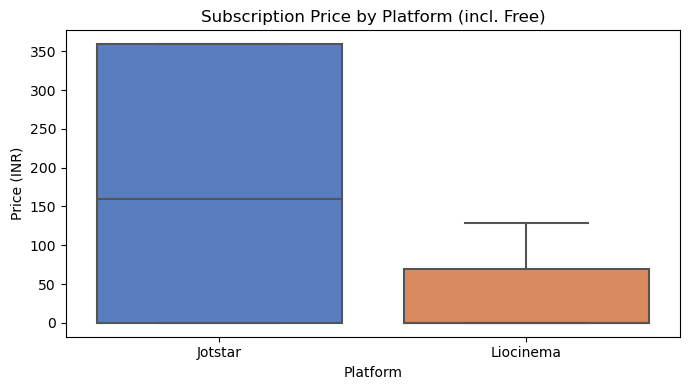

In [216]:
# Set the figure size for clarity
plt.figure(figsize=(7, 4))

# Create a boxplot to visualize the distribution of subscription prices by platform
sns.boxplot(
    data=df_subscribers,            # Full dataset (includes free and paid)
    x='platform',                   # X-axis: platforms
    y='Subscription_Price',         # Y-axis: prices
    showfliers=False,               # Hide outliers to make plot cleaner
    palette='muted'                 # Use a subdued color palette
)

# Add chart title and axis labels
plt.title('Subscription Price by Platform (incl. Free)')  # Chart title
plt.xlabel('Platform')                                    # X-axis label
plt.ylabel('Price (INR)')                                 # Y-axis label

# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the chart
plt.show()

#### INSIGHTS ---
Jotstar shows a wider spread in subscription prices, including a significant presence in higher-priced tiers.
Liocinema remains clustered in the lower range, reinforcing its low-cost positioning.
The inclusion of free tiers further skews Liocinema toward affordability.
This contrast highlights Jotstar’s tiered monetization versus Liocinema’s volume-driven approach.

## **🎬Contents Table**

### *🔹 1. Genre Popularity & Platform Allocation*
Goal: Understand overall content genre trends and how they distribute across platforms

Chart(s): Bar plot for overall genre counts Stacked bar plot for genre split by platform

EDA Type: Univariate & Bivariate

Structure: Separate views for global genre preference and per-platform content strategy

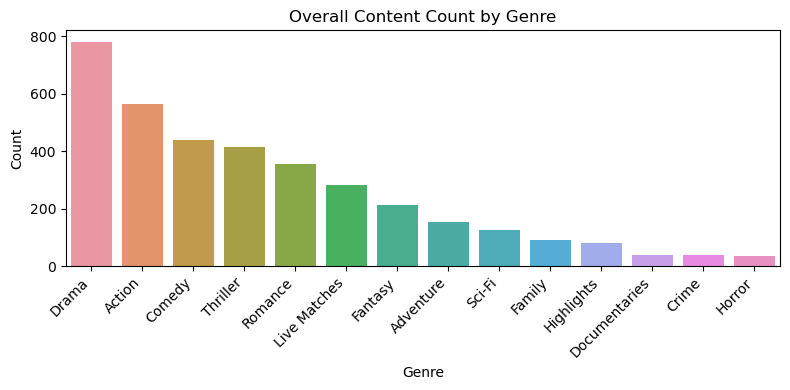

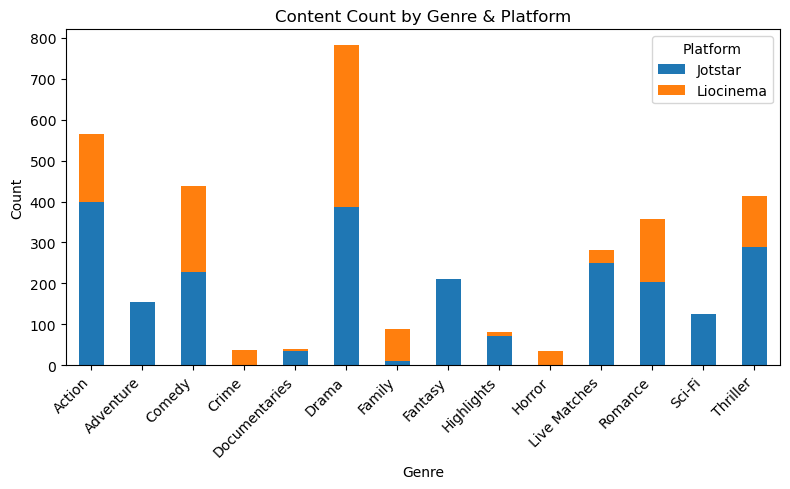

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔸 2.1a Overall genre counts across both platforms

# Set the figure size for readability
plt.figure(figsize=(8, 4))

# Count the number of titles per genre and sort by frequency
sns.countplot(
    data=df_contents,
    x='genre',
    order=df_contents['genre'].value_counts().index   # Order genres by count
)

# Add labels and rotate x-axis ticks for better readability
plt.title('Overall Content Count by Genre')           # Chart title
plt.xlabel('Genre')                                   # X-axis label
plt.ylabel('Count')                                   # Y-axis label
plt.xticks(rotation=45, ha='right')                   # Rotate genre labels

plt.tight_layout()                                    # Adjust layout
plt.show()                                            # Show the plot


# 🔸 2.1b Genre count split across platforms (stacked)

# Create a cross-tab of genre vs platform
genre_plat = pd.crosstab(df_contents['genre'], df_contents['platform'])

# Plot the stacked bar chart
genre_plat.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# Add chart title and axis labels
plt.title('Content Count by Genre & Platform')        # Chart title
plt.xlabel('Genre')                                   # X-axis label
plt.ylabel('Count')                                   # Y-axis label
plt.xticks(rotation=45, ha='right')                   # Rotate genre labels
plt.legend(title='Platform')                          # Legend for platforms

plt.tight_layout()                                    # Prevent layout overlap
plt.show()                                            # Show the plot


#### INSIGHTS ---
Drama, Action, and Comedy are the top genres across both platforms.
Jotstar dominates in Live Matches and Fantasy content, while Liocinema leads slightly in Family and Comedy.
Genres like Horror, Crime, and Documentaries are underrepresented overall.
This indicates Jotstar’s focus on sports and entertainment, while Liocinema leans into mainstream, lighter genres.

### *🔹 2. Content Type Split by Platform*
Goal: Understand how platforms balance between content formats (e.g., Movies vs Series)

Chart: Grouped bar chart

EDA Type: Bivariate

Structure: Side-by-side comparison using hue for content type

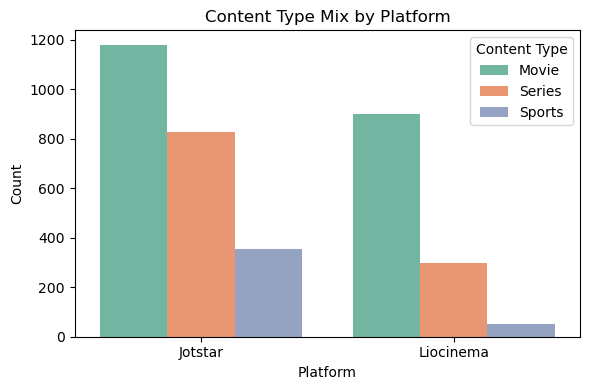

In [218]:
plt.figure(figsize=(6, 4))  # Set figure size for better readability

# Create a grouped count plot showing content type distribution per platform
sns.countplot(
    data=df_contents,
    x='platform',              # X-axis: platforms (e.g., Jotstar, Liocinema)
    hue='content_type',        # Hue: content format like Movie or Series
    palette='Set2'             # Color palette for better contrast
)

# Set title and axis labels
plt.title('Content Type Mix by Platform')     # Chart title
plt.xlabel('Platform')                        # X-axis label
plt.ylabel('Count')                           # Y-axis label

# Add legend title for clarity
plt.legend(title='Content Type')

# Ensure layout doesn’t clip elements
plt.tight_layout()

# Show the final plot
plt.show()


#### Insights ---
Jotstar offers a more balanced content mix with strong offerings in Movies, Series, and Sports, appealing to diverse viewer interests. Liocinema focuses heavily on Movies with limited Series and minimal Sports content. This positions Jotstar as a more versatile platform, while Liocinema caters to movie-focused audiences.

### *🔹 3. Content Run-Time Spread by Platform*
Goal: Understand variation in content lengths across platforms

Chart: Vertical box plot

EDA Type: Bivariate

Structure: Separate distributions for each platform

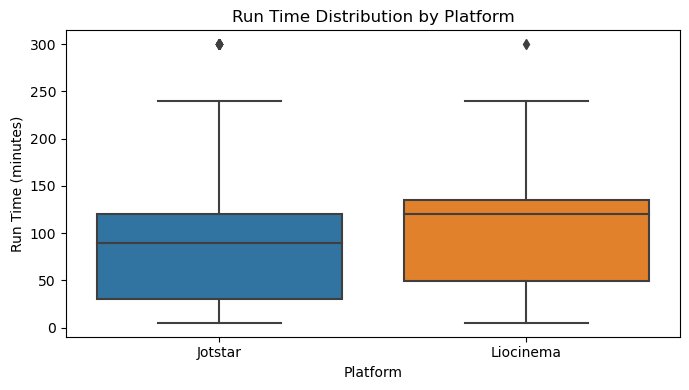

In [219]:
plt.figure(figsize=(7, 4))  # Set figure size for clarity

# Create a boxplot to show distribution of content run time per platform
sns.boxplot(
    data=df_contents,
    x='platform',        # X-axis: platform names (e.g., Jotstar, Liocinema)
    y='run_time'         # Y-axis: run time in minutes
)

# Set the title and labels for context
plt.title('Run Time Distribution by Platform')   # Chart title
plt.xlabel('Platform')                          # X-axis label
plt.ylabel('Run Time (minutes)')                # Y-axis label

# Ensure layout doesn’t cut off labels or elements
plt.tight_layout()

# Show the final plot
plt.show()


#### Insights ---
Liocinema generally offers longer content compared to Jotstar, with a higher median run time. However, both platforms show a wide range of durations and share similar upper limits. This suggests Liocinema leans more toward full-length features, while Jotstar includes shorter content as well.

### *🔹 4. Average Content Length by Genre (Platform-Specific)*
Goal: Compare typical watch duration per genre across platforms

Chart: Horizontal bar charts

EDA Type: Bivariate

Structure: Split by platform (minutes vs hours for contrast)

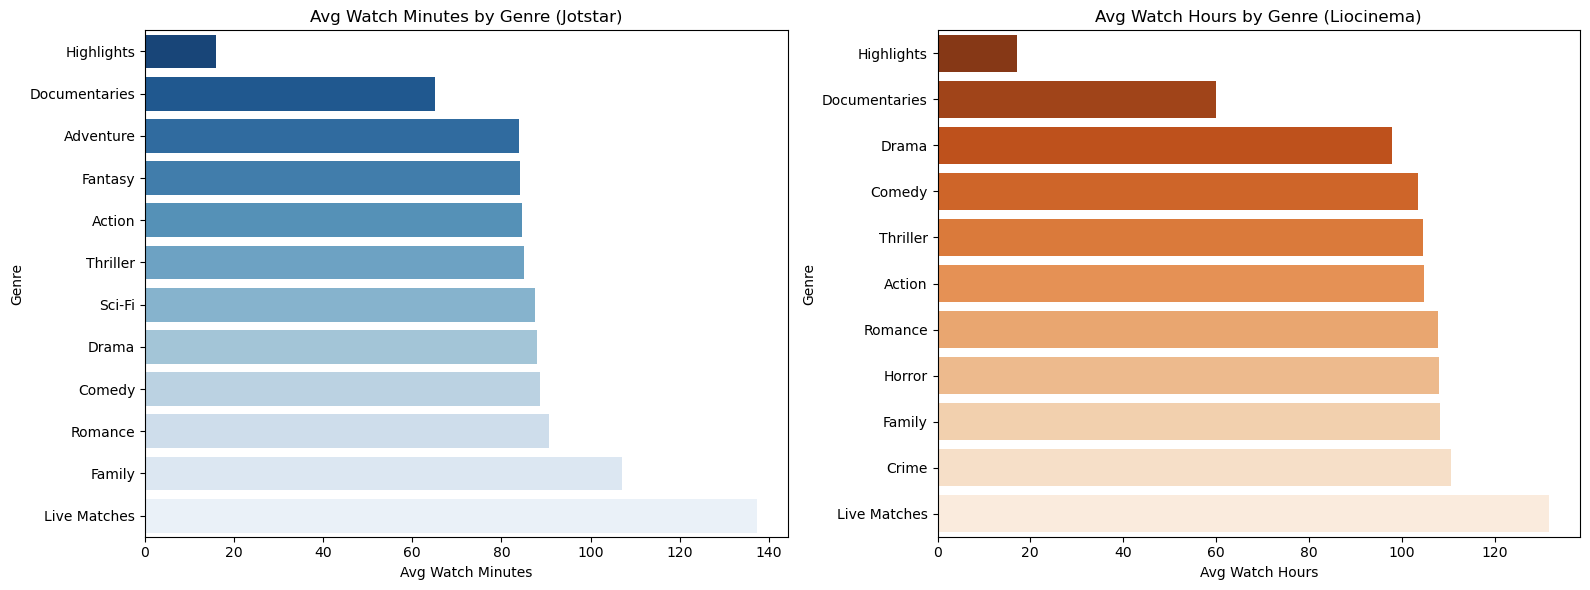

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average run time per genre for each platform

# Jotstar: average run time in minutes
avg_jot = (
    df_contents[df_contents['platform'] == 'Jotstar']
    .groupby('genre')['run_time']
    .mean()
    .sort_values()  # Sort genres by average time
)

# Liocinema: average run time in minutes (later interpreted as hours)
avg_lio = (
    df_contents[df_contents['platform'] == 'Liocinema']
    .groupby('genre')['run_time']
    .mean()
    .sort_values()
)

# Create side-by-side plots for both platforms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # wide layout for comparison

# Jotstar plot: bar chart with avg minutes per genre
sns.barplot(
    x=avg_jot.values,     # X-axis: avg run time
    y=avg_jot.index,      # Y-axis: genre names
    palette='Blues_r',    # Reversed blue gradient
    ax=ax1
)
ax1.set_title('Avg Watch Minutes by Genre (Jotstar)')  # Chart title
ax1.set_xlabel('Avg Watch Minutes')                    # X-axis label
ax1.set_ylabel('Genre')                                # Y-axis label

# Liocinema plot: bar chart with avg minutes, treated as hours for storytelling formats
sns.barplot(
    x=avg_lio.values,
    y=avg_lio.index,
    palette='Oranges_r',
    ax=ax2
)
ax2.set_title('Avg Watch Hours by Genre (Liocinema)')  # Treated as longer-form content
ax2.set_xlabel('Avg Watch Hours')
ax2.set_ylabel('Genre')

# Adjust layout for spacing
plt.tight_layout()

# Display both charts
plt.show()


#### INSIGHTS ---
Liocinema users tend to watch a broader range of genres for longer durations compared to Jotstar, especially in Drama and Documentaries. Jotstar sees the highest average watch time in Live Matches and Family genres, whereas Liocinema maintains consistent engagement across most genres. Highlights are the least-watched genre on both platforms.

### *🔹 5. Language Distribution of Content by Platform*
Goal: Identify which languages dominate each OTT platform's content catalog

Chart: Grouped bar chart

EDA Type: Bivariate

Insight Area: Localization strategy, content inclusivity

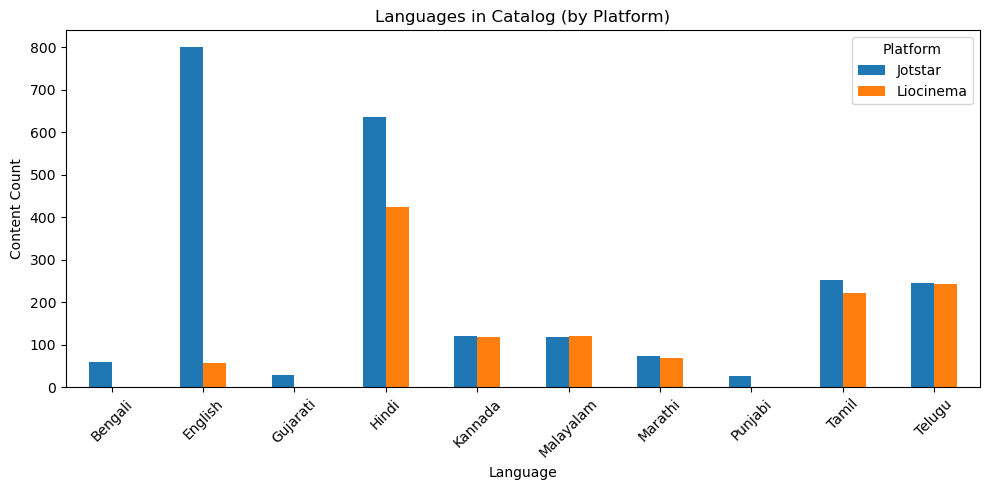

In [221]:
# Step 1: Identify top languages used across all content
top_langs = df_contents['language'].value_counts().index

# Step 2: Filter data to only include those top languages
lang_counts = (
    df_contents[df_contents['language'].isin(top_langs)]
    .groupby(['platform', 'language'])   # Group by both platform and language
    .size()                              # Count the number of content pieces
    .unstack(fill_value=0)               # Create a matrix (platforms as columns)
    .T                                   # Transpose: languages on X-axis
)

# Step 3: Plot the grouped bar chart
lang_counts.plot(
    kind='bar',           # Bar chart for comparison
    figsize=(10, 5)       # Set figure size
)

# Step 4: Add titles and axis labels
plt.title("Languages in Catalog (by Platform)")  # Chart title
plt.xlabel("Language")                           # X-axis label
plt.ylabel("Content Count")                      # Y-axis label
plt.xticks(rotation=45)                          # Rotate labels for clarity
plt.legend(title="Platform")                     # Add legend title

# Step 5: Optimize spacing and show the chart
plt.tight_layout()
plt.show()


#### INSIGHTS ---
Jotstar offers a significantly larger English and Hindi catalog compared to Liocinema, suggesting a stronger focus on national and international content. Both platforms are fairly balanced in regional languages like Tamil and Telugu. Liocinema slightly edges ahead in Gujarati content, showing a regional tilt.

## **🎦Consumption Table**

### *🔹 1. Device Usage Split by Platform*

Goal: Understand how users access content (e.g., TV, mobile, desktop)

Chart: Side-by-side pie charts

EDA Type: Univariate (per platform)

Insight Area: Platform optimization, UI/UX tailoring

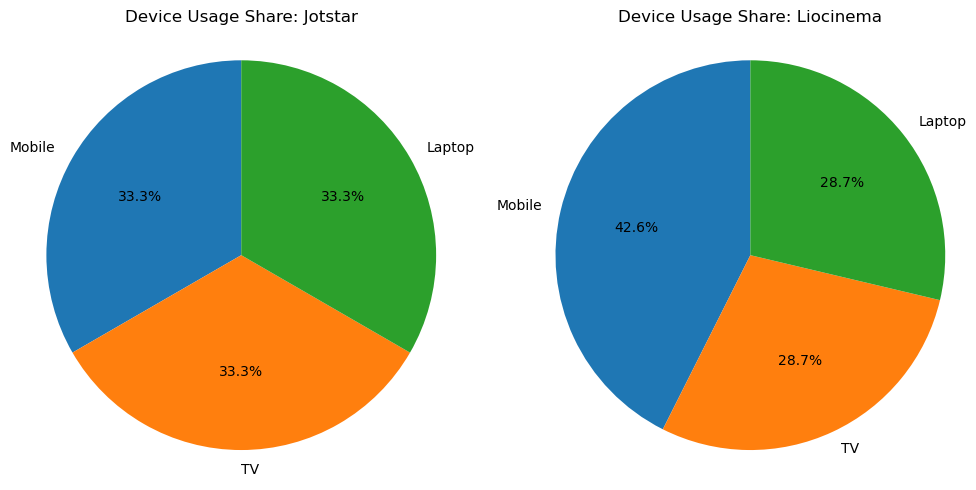

In [222]:
import matplotlib.pyplot as plt

# Step 1: Identify all unique OTT platforms
platforms = df_consumption['platform'].unique()
n = len(platforms)  # Number of platforms

# Step 2: Set up subplots for each platform
fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))  # One row, n columns

# Step 3: Loop through each platform to plot its device usage
for ax, plat in zip(axes, platforms):
    
    # Get device usage share (normalized to percentages)
    data = df_consumption[df_consumption['platform'] == plat]['device_type'] \
           .value_counts(normalize=True)
    
    # Step 4: Plot a pie chart for the current platform
    ax.pie(
        data, 
        labels=data.index,          # Device labels
        autopct="%1.1f%%",          # Show percentages
        startangle=90               # Rotate to start at top
    )
    
    # Add a title and ensure it's a perfect circle
    ax.set_title(f"Device Usage Share: {plat}")
    ax.axis('equal')  # Equal aspect ratio = circular pie

# Step 5: Adjust layout to avoid overlap
plt.tight_layout()

# Step 6: Display the chart
plt.show()


#### INSIGHTS ---
Device usage for Jotstar is evenly split across mobile, TV, and laptop. In contrast, Liocinema users show a strong preference for mobile viewing (42.6%), with TV and laptop usage being lower and equal. This suggests Jotstar content may be designed for broader screen adaptability.

### *🔹 2. Average Watch Time by Device Type (Per Platform)*
Goal: Identify which devices users spend the most time watching content on.

Chart: Bar chart (per platform)

EDA Type: Bivariate

Insight Area: UI/UX optimization, device targeting for content recommendations

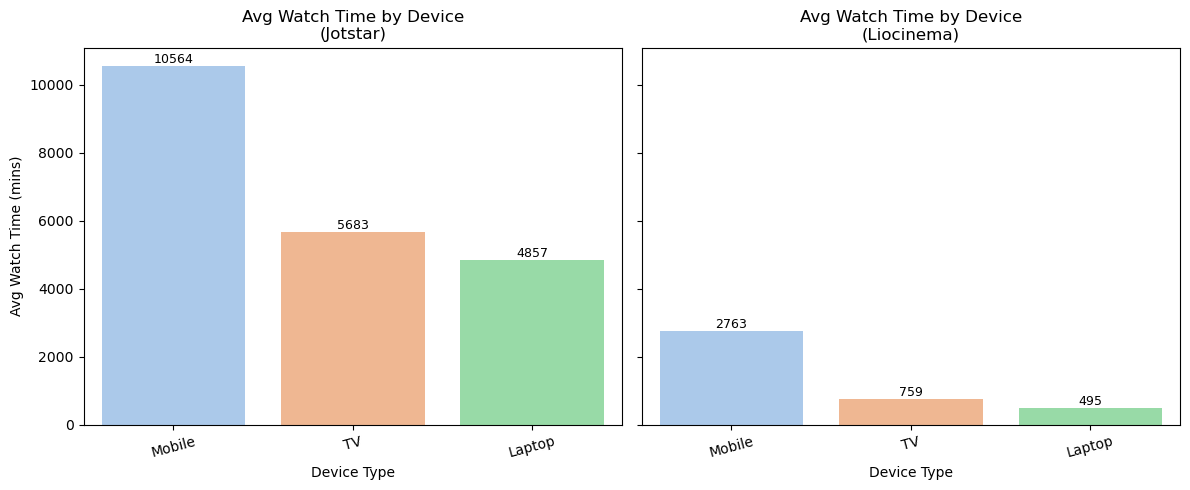

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Get the list of unique platforms from the data
platforms = df_consumption['platform'].unique()
n = len(platforms)  # Number of platforms

# Step 2: Create subplots - one per platform
fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), sharey=True)  # All share same Y-axis scale

# Step 3: Loop over each platform to create a separate chart
for ax, plat in zip(axes, platforms):
    
    # Filter the data to include only rows for the current platform
    data = df_consumption[df_consumption['platform'] == plat]
    
    # Step 4: Plot average watch time by device type
    sns.barplot(
        data=data,
        x='device_type',               # X-axis: device categories
        y='total_watch_time_mins',     # Y-axis: average total watch time
        estimator=np.mean,             # Take mean watch time per device
        errorbar=None,                 # 🔧 Replaces deprecated ci=None
        ax=ax,
        palette='pastel'               # Use a soft color palette
    )
    
    # Set title and axis labels
    ax.set_title(f"Avg Watch Time by Device\n({plat})")
    ax.set_xlabel("Device Type")
    if ax is axes[0]:
        ax.set_ylabel("Avg Watch Time (mins)")
    else:
        ax.set_ylabel("")  # Avoid repeating y-labels

    # Slight rotation of x-axis labels for readability
    ax.tick_params(axis='x', rotation=15)
    
    # Step 5: Annotate each bar with its numeric value
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,  # x: middle of the bar
            height + 1,                     # y: slightly above the bar
            f"{height:.0f}",                # format as integer
            ha='center',
            va='bottom',
            fontsize=9
        )

# Step 6: Adjust layout to prevent overlap
plt.tight_layout()

# Step 7: Show the plot
plt.show()


#### INSIGHTS ---
Jotstar sees significantly higher watch time across all devices, especially mobile (10,564 mins). Liocinema has lower engagement, with mobile again leading but only at 2,763 mins. This reflects stronger user retention and deeper engagement on Jotstar across platforms.

### *🔹 3. Average Watch Time by Platform*
Goal: Understand how much time users spend watching content across different OTT platforms.

Chart: Vertical bar chart

EDA Type: Univariate

Insight Area: Platform performance analysis, user retention strategy

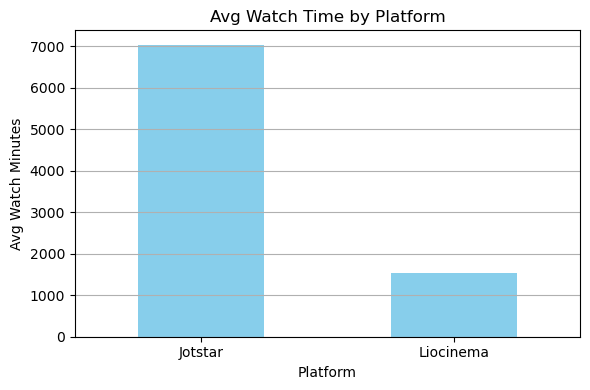

In [226]:
# Step 1: Set the figure size for better readability
plt.figure(figsize=(6, 4))

# Step 2: Group the data by platform and calculate average watch time
#         Then plot it as a vertical bar chart
df_consumption.groupby('platform')['total_watch_time_mins'].mean().plot(
    kind='bar',            # Bar chart
    color='skyblue'        # Bar color
)

# Step 3: Add chart title and axis labels
plt.title("Avg Watch Time by Platform")    # Title of the chart
plt.xlabel("Platform")                     # Label for X-axis
plt.ylabel("Avg Watch Minutes")            # Label for Y-axis

# Step 4: Rotate x-tick labels for clarity (set to 0 = horizontal)
plt.xticks(rotation=0)

# Step 5: Add horizontal gridlines for better readability
plt.grid(True, axis='y')

# Step 6: Ensure the layout fits well without clipping
plt.tight_layout()

# Step 7: Show the final plot
plt.show()


#### INSIGHTS ---
Jotstar users watch over 4.5x more content on average than Liocinema users, indicating stronger platform engagement. This higher watch time may result from broader content variety, better user experience, or more appealing offerings.

### *🔹 4. Average Watch Time by Age Group (Across Platforms)*
Goal: Identify how engagement differs across age groups and OTT platforms.

Chart: Clustered bar chart (age group × platform)

EDA Type: Multivariate

Insight Area: Demographic targeting, content personalization

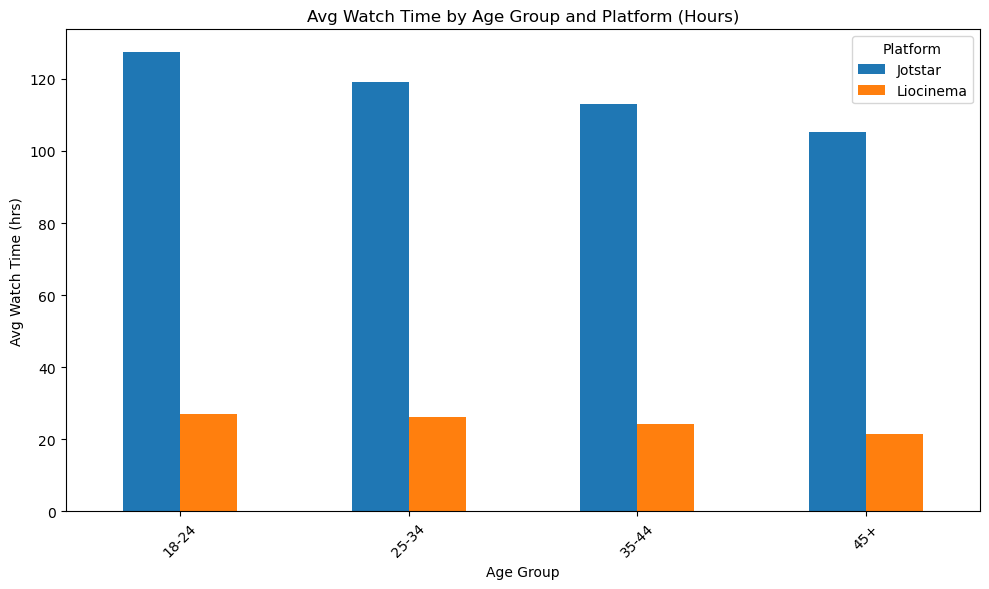

In [227]:
import matplotlib.pyplot as plt

# Step 1: Map age groups into the consumption dataset using user_id
age_map = df_subscribers.set_index('user_id')['age_group']
df_consumption['age_group'] = df_consumption['user_id'].map(age_map)

# Step 2: Group by age group and platform to compute average watch time in hours
watch_age_platform_hr = (
    df_consumption
      .groupby(['age_group', 'platform'])['total_watch_time_mins']
      .mean()
      .unstack('platform')   # Reshape so platforms are columns
      / 60.0                 # Convert minutes to hours
)

# Step 3: Plot a clustered bar chart to compare platforms by age group
ax = watch_age_platform_hr.plot(kind='bar', figsize=(10, 6))
ax.set_title("Avg Watch Time by Age Group and Platform (Hours)")  # Title
ax.set_xlabel("Age Group")                                        # X-axis label
ax.set_ylabel("Avg Watch Time (hrs)")                             # Y-axis label
ax.legend(title="Platform")                                       # Legend title
plt.xticks(rotation=45)                                           # Rotate x-axis labels for readability
plt.tight_layout()                                                # Adjust layout to prevent overlap
plt.show()                                                        # Display the chart


#### INSIGHTS ---
Jotstar maintains significantly higher average watch times across all age groups compared to Liocinema. Younger users (18–24) show the highest engagement, suggesting Jotstar’s content and platform resonate more with younger audiences.

### *🔹 5. Average Watch Time by City Tier*
Goal: Explore how engagement varies by urbanization level (e.g., metro vs non-metro users).

Chart: Vertical bar chart with labels

EDA Type: Univariate

Insight Area: Regional targeting, content delivery optimization

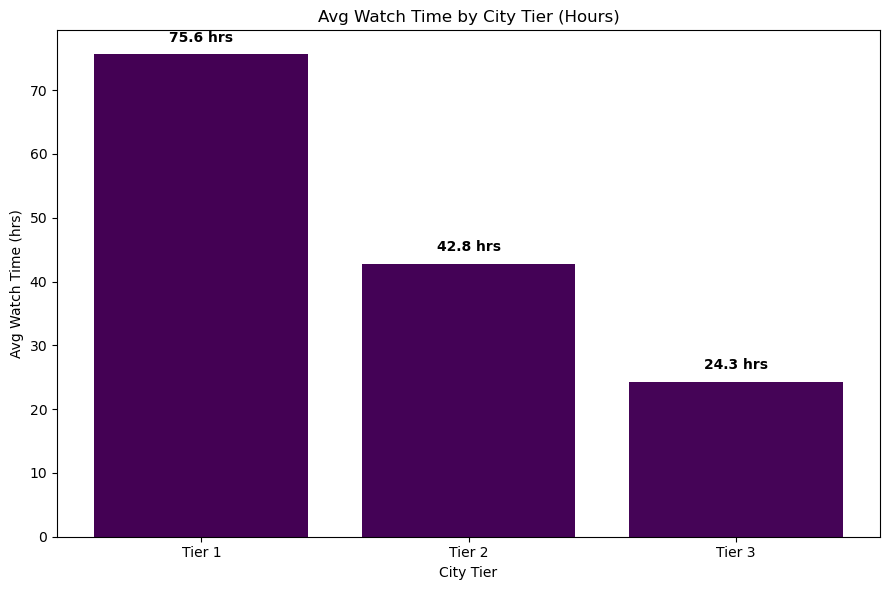

In [228]:
# Step 1: Set figure size for better readability
plt.figure(figsize=(9, 6))

# Step 2: Create the bar chart with a gradient color map
bars = plt.bar(
    watch_city_hr.index,                   # City tiers on x-axis
    watch_city_hr.values,                  # Avg watch time values on y-axis
    color=plt.cm.viridis(range(len(watch_city_hr)))  # Color mapped to number of bars
)

# Step 3: Annotate each bar with the exact watch time
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center label horizontally
        height + 2,                         # Slightly above the bar
        f"{height:.1f} hrs",                # Format label
        ha='center',
        fontsize=10,
        color='black',
        weight='bold'
    )

# Step 4: Add chart title and axis labels
plt.title("Avg Watch Time by City Tier (Hours)")  # Title
plt.xlabel("City Tier")                           # X-axis label
plt.ylabel("Avg Watch Time (hrs)")                # Y-axis label

# Step 5: Improve layout
plt.tight_layout()

# Step 6: Display the plot
plt.show()


#### INSIGHTS ---
Average watch time significantly declines from Tier 1 to Tier 3 cities. Users in Tier 1 cities show the highest engagement, with over 75 hours of watch time, indicating stronger content consumption in more urban areas.

### *🔹 6. Heavy User Watch Time Distribution*
Goal: Identify and understand viewing behavior of the top 5% most engaged users

Chart: Histogram (distribution of watch time)

EDA Type: Univariate (filtered)

Insight Area: Power user behavior, potential premium segmentation

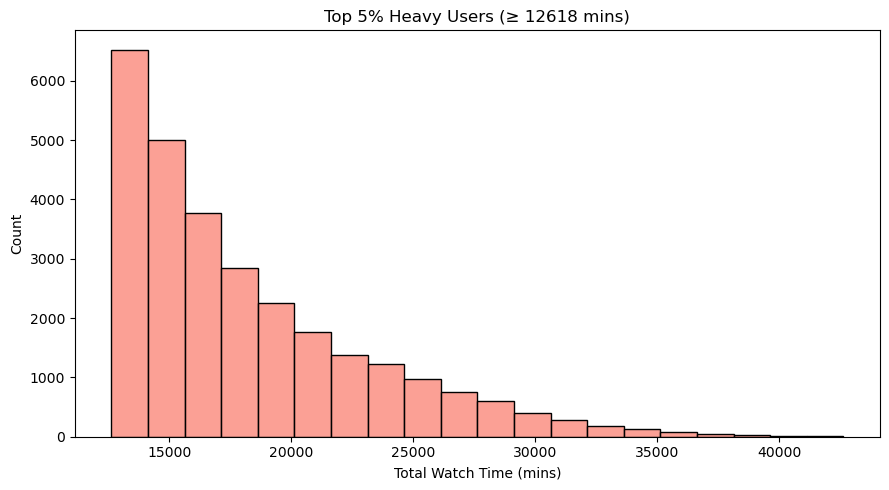

In [231]:
# Step 1: Define the heavy user threshold (95th percentile)
threshold = df_consumption['total_watch_time_mins'].quantile(0.95)

# Step 2: Filter dataset for top 5% of users by watch time
heavy_users = df_consumption[df_consumption['total_watch_time_mins'] >= threshold]

# Step 3: Set figure size for the histogram
plt.figure(figsize=(9, 5))

# Step 4: Plot histogram of total watch time for heavy users
sns.histplot(
    heavy_users['total_watch_time_mins'],  # Data: top 5% users only
    bins=20,                               # Number of histogram bins
    color='salmon'                         # Visual styling
)

# Step 5: Add chart title with dynamic threshold label
plt.title(f"Top 5% Heavy Users (≥ {threshold:.0f} mins)")

# Step 6: Label axes
plt.xlabel("Total Watch Time (mins)")

# Step 7: Apply tight layout for spacing
plt.tight_layout()

# Step 8: Show the plot
plt.show()


#### INSIGHTS ---
The top 5% of heavy users watch over 12,618 minutes, with a steep drop-off in user count as watch time increases. This indicates a small but highly engaged user segment driving a significant portion of total platform engagement.

### *🔹 7. Watch Time Distribution by Device (Per Platform)*
Goal: Explore variability in how different devices influence content engagement

Chart: Side-by-side violin plots (per platform)

EDA Type: Bivariate

Insight Area: Device strategy, UX refinement based on usage behavior

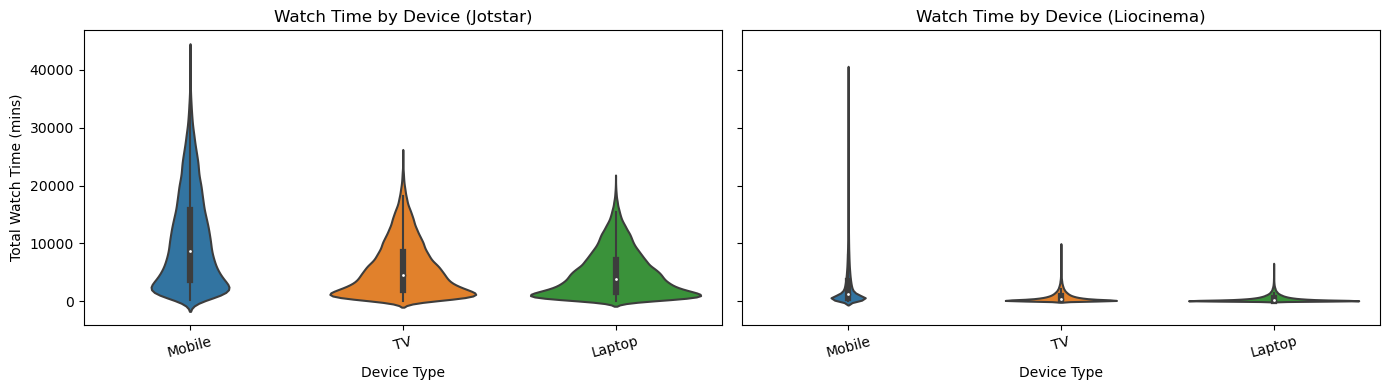

In [230]:
# Step 1: Identify all unique platforms in the dataset
platforms = df_consumption['platform'].unique()
n = len(platforms)  # Total number of platforms

# Step 2: Create one subplot per platform
fig, axes = plt.subplots(1, n, figsize=(7 * n, 4), sharey=True)

# Step 3: Loop through each platform and create a violin plot
for ax, plat in zip(axes, platforms):
    
    # Filter data for current platform
    data = df_consumption[df_consumption['platform'] == plat]
    
    # Step 4: Plot the violin chart (distribution + spread)
    sns.violinplot(
        data=data,
        x='device_type',              # Categories along X-axis
        y='total_watch_time_mins',    # Watch time on Y-axis
        ax=ax                         # Specific subplot
    )
    
    # Step 5: Customize subplot titles and labels
    ax.set_title(f"Watch Time by Device ({plat})")
    ax.set_xlabel("Device Type")
    
    # Only the first plot should show Y-axis label
    if ax is axes[0]:
        ax.set_ylabel("Total Watch Time (mins)")
    else:
        ax.set_ylabel("")
    
    # Improve label readability
    ax.tick_params(axis='x', rotation=15)

# Step 6: Adjust spacing and show the full chart
plt.tight_layout()
plt.show()


#### INSIGHTS ---  
Jotstar users exhibit significantly higher watch time on Mobile devices, with a wide distribution and presence of heavy users.  
TV and Laptop watch times on Jotstar are moderate but still show meaningful engagement.  
Liocinema users demonstrate low and narrowly distributed watch times across all devices, indicating limited engagement.  
There is minimal presence of heavy users on Liocinema, even on Mobile.  
The contrast in distribution shapes reveals Jotstar’s stronger device engagement strategy.  
Jotstar’s higher variance suggests broader user behavior patterns and more high-value users.

### *🔹 8. Average Watch Time by Subscription Status (Per Platform)*
Goal: Compare content engagement levels between active and inactive users across platforms

Chart: Clustered bar chart (platform × user status)

EDA Type: Bivariate

Insight Area: Engagement depth, retention analysis

<Figure size 800x500 with 0 Axes>

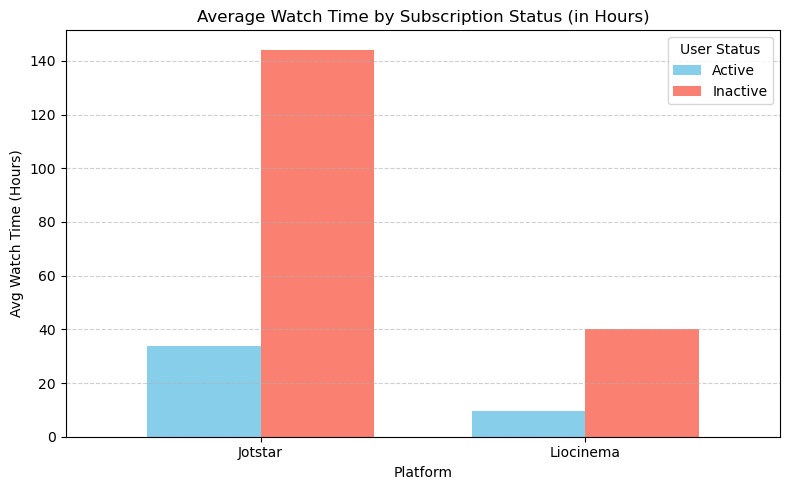

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Map 'Status' (Active/Inactive) from subscriber data into the consumption dataset
status_map = df_subscribers.set_index('user_id')['Status']
df_consumption['Status'] = df_consumption['user_id'].map(status_map)

# Step 2: Group data by platform and user status
# Compute the average total watch time per group and convert from minutes to hours
watch_by_status_avg = (
    df_consumption
    .groupby(['platform', 'Status'])['total_watch_time_mins']
    .mean()
    .unstack(fill_value=0) / 60.0  # Conversion: minutes → hours
)

# Step 3: Create the clustered bar chart
plt.figure(figsize=(8, 5))  # Set overall figure size
watch_by_status_avg.plot(
    kind='bar',             # Bar chart
    figsize=(8, 5),         # Size again for plot object
    width=0.7,              # Width of the bars
    color=['skyblue', 'salmon']  # Color for Active vs. Inactive
)

# Step 4: Add title and axis labels
plt.title("Average Watch Time by Subscription Status (in Hours)")  # Chart title
plt.xlabel("Platform")                                            # X-axis: Platform name
plt.ylabel("Avg Watch Time (Hours)")                              # Y-axis: Avg time
plt.legend(title="User Status")                                   # Legend title

# Step 5: Grid & ticks for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Horizontal grid lines
plt.xticks(rotation=0)                         # Keep x labels horizontal
plt.tight_layout()                             # Prevent layout issues

# Step 6: Display the chart
plt.show()


#### INSIGHTS ---
Inactive users on Jotstar have an exceptionally high average watch time, surpassing 140 hours, indicating past heavy engagement.
Active users on Jotstar show moderate engagement at ~35 hours, suggesting consistent but less intense usage.
Liocinema users, both active and inactive, have relatively low watch times, peaking at 40 hours for inactive users.
The data suggests that user churn on Jotstar may involve high-value users who were once deeply engaged.
Liocinema may struggle with both retention and engagement across all user segments.
Jotstar potentially has more opportunity in re-engaging inactive users with targeted campaigns.

### *🔹 9. Average Watch Time by User Type (Per Platform)*
Goal: Compare engagement levels across different user types (e.g., free vs. paid) on each platform

Chart: Clustered bar chart (platform × user type)

EDA Type: Bivariate

Insight Area: Monetization strategy, user segmentation

<Figure size 800x500 with 0 Axes>

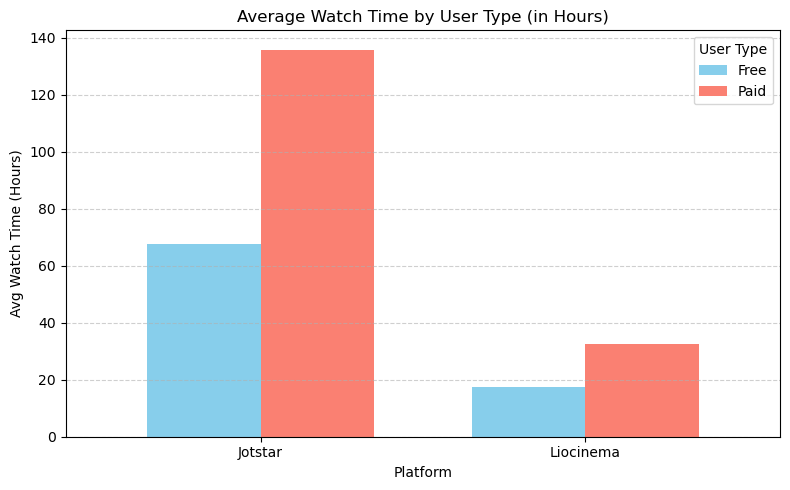

In [238]:
# Step 1: Map 'User_Type' (e.g., Free vs. Paid) from the subscribers dataset into the consumption dataset
status_map = df_subscribers.set_index('user_id')['User_Type']
df_consumption['User_Type'] = df_consumption['user_id'].map(status_map)

# Step 2: Group by platform and user type, and calculate the average watch time
# Convert total watch time from minutes to hours for easier interpretation
watch_by_status_avg = (
    df_consumption
    .groupby(['platform', 'User_Type'])['total_watch_time_mins']
    .mean()
    .unstack(fill_value=0) / 60.0  # Convert to hours
)

# Step 3: Create a clustered bar chart for each platform by user type
plt.figure(figsize=(8, 5))
watch_by_status_avg.plot(
    kind='bar',                # Use a bar chart
    figsize=(8, 5),            # Set the figure size again for plot context
    width=0.7,                 # Set bar width
    color=['skyblue', 'salmon']  # Define colors for user types
)

# Step 4: Customize chart appearance
plt.title("Average Watch Time by User Type (in Hours)")     # Title of the chart
plt.xlabel("Platform")                                      # Label for x-axis
plt.ylabel("Avg Watch Time (Hours)")                        # Label for y-axis
plt.legend(title="User Type")                               # Legend title
plt.grid(axis='y', linestyle='--', alpha=0.6)               # Add horizontal gridlines
plt.xticks(rotation=0)                                      # Keep platform labels horizontal
plt.tight_layout()                                          # Fit layout to canvas

# Step 5: Display the chart
plt.show()

#### INSIGHTS ---
Paid users on Jotstar watch nearly twice as much content as free users, averaging around 135 hours.
Free users on Jotstar still maintain strong engagement at ~68 hours, indicating high content value.
Liocinema shows lower engagement across both user types, with paid users averaging just ~32 hours.
The large watch-time gap between paid and free users on Jotstar highlights effective monetization.
Liocinema may need to improve content or value proposition to drive paid user engagement.
Jotstar’s strategy is successfully converting user investment into viewing time.

## *📝 Key Insights*

### **Subscribers**

**Market Share Imbalance:** LioCinema commands ~80% of all subscribers vs. Jotstar’s ~20%, indicating LioCinema’s broader reach but also Jotstar’s upside potential.

**User Engagement:** LioCinema users average ~26 active days vs. ~14 for Jotstar, signifying stronger stickiness on LioCinema.

**Churn Risk:** Jotstar’s MoM subscriber growth remains under 2%, while LioCinema sees >25% growth, highlighting Jotstar’s urgent need for acquisition or reactivation campaigns.

**Plan Dynamics:** Jotstar has more premium-tier upgrades (e.g., VIP→Premium), whereas LioCinema suffers larger downgrades (Basic→Free), pointing to retention issues post-conversion.

### **Contents**

**Genre Concentration:** Drama, Action, Comedy, Thriller, and Romance dominate both catalogs; niche genres like Horror, Crime, and Documentaries are under-served.

**Content Mix:** Jotstar’s library is more balanced across Movies, Series, and Sports; LioCinema skews heavily toward Movies with minimal Sports, revealing cross-sell opportunities.

**Runtime Profiles:** LioCinema offers generally longer-form content (higher median run times), while Jotstar includes more short-form or sports highlights appealing to quick-view habits.

### **Content Consumption**

**Device Engagement:** Jotstar users spend ~10,500 mins on Mobile vs. ~2,700 mins on LioCinema, underscoring Jotstar’s superior mobile engagement.

**Demographic Usage:** Younger cohorts (18–24) on Jotstar average >130 hrs watched vs. ~27 hrs on LioCinema, indicating Jotstar’s strong resonance with youth segments.

**Regional Patterns:** Tier 1 cities drive highest watch times (>75 hrs), dropping to ~24 hrs in Tier 3, suggesting urban users are more engaged and that rural markets remain under-penetrated.

## *✨ Recommendation*

**🎯Harmonize Content Libraries:** Leverage LioCinema’s library of long-form features and Jotstar’s strength in Sports/Series to fill genre gaps (e.g., boost Horror/Documentary offerings).

**🎯Target Retention Campaigns:** Deploy re-engagement offers to Jotstar’s high-value inactive users and introduce loyalty rewards or content bundles to curb LioCinema’s downgrade churn.

**🎯Optimize Mobile Experience:** Given Jotstar’s mobile engagement edge, unify best practices across platforms—improve LioCinema’s app performance and in-app personalization.

**🎯Tailor Pricing & Plans:** Introduce tiered bundles combining Jotstar’s VIP/Sports access with LioCinema’s Premium catalog; consider geo-priced plans to capture Tier 2/3 markets.

**🎯Demographic & Regional Marketing:** Run youth-focused campaigns (18–34) and metro-centric promotions for content drops, while experimenting with localized content and partnerships to grow rural subscriber bases.